# AVOCADO CASE STUDY

## Importing important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PowerTransformer 
from scipy.stats import zscore
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


# Data Description

#####  Avacado Project
Problem Statement:

Avocado is a fruit consumed by people heavily in the United States. 

###### Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

## Importing DataSet

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Bhushan0130/Datasets/main/avocado.csv')
df.shape  # dataset shape

# (18249, 14)

(18249, 14)

In [3]:
pd.set_option('display.max_rows', None)  # to maximize display of the rows
pd.set_option('display.max_columns', None)  # to maximize display of the columns

In [4]:
df.head()  # top 5 rows

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [5]:
df.sample(4)   # 4 random column

Unnamed: 0        Date  AveragePrice  Total Volume       4046  \
1915           43  2015-03-01          0.94     598755.26  138994.95   
14479          50  2016-01-10          1.42       6987.04    2159.08   
16             16  2015-09-06          1.11      99172.96     879.45   
14708          19  2016-08-14          1.72      16857.19    3292.50   

            4225      4770  Total Bags  Small Bags  Large Bags  XLarge Bags  \
1915   359783.57  16252.30    83724.44    79396.05     4310.94        17.45   
14479     669.21      0.00     4158.75      926.19     3232.56         0.00   
16      90062.62    240.79     7990.10     7762.87      227.23         0.00   
14708    2737.61     16.99    10810.09     6816.67     3993.42         0.00   

               type  year            region  
1915   conventional  2015          Portland  
14479       organic  2016           StLouis  
16     conventional  2015            Albany  
14708       organic  2016  WestTexNewMexico

In [6]:
df.tail()      # 5 bottom rows

Unnamed: 0        Date  AveragePrice  Total Volume     4046     4225  \
18244           7  2018-02-04          1.63      17074.83  2046.96  1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70  3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92  2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63  2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77  2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
18244    0.00    13498.67    13066.82      431.85          0.0  organic  2018   
18245    0.00     9264.84     8940.04      324.80          0.0  organic  2018   
18246  727.94     9394.11     9351.80       42.31          0.0  organic  2018   
18247  727.01    10969.54    10919.54       50.00          0.0  organic  2018   
18248  224.53    12014.15    11988.14       26.01          0.0  organic  2018   

                 region  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico

## Information about dataset

In [7]:
df.info()


# 0   Unnamed: 0    18249 non-null  int64  
#  1   Date          18249 non-null  object 
#  2   AveragePrice  18249 non-null  float64
#  3   Total Volume  18249 non-null  float64
#  4   4046          18249 non-null  float64
#  5   4225          18249 non-null  float64
#  6   4770          18249 non-null  float64
#  7   Total Bags    18249 non-null  float64
#  8   Small Bags    18249 non-null  float64
#  9   Large Bags    18249 non-null  float64
#  10  XLarge Bags   18249 non-null  float64
#  11  type          18249 non-null  object 
#  12  year          18249 non-null  int64  
#  13  region        18249 non-null  object 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [8]:
# Each columns are containing 18249 non null values
# Date column is of object type it should be date type
# Type and region columns are of object type 
# Wherease, other columns are float64 type
# No null value are present in the dataset
# Total 14 columns are present and 18249 rows

In [9]:
df.dtypes

# Unnamed: 0        int64
# Date             object
# AveragePrice    float64
# Total Volume    float64
# 4046            float64
# 4225            float64
# 4770            float64
# Total Bags      float64
# Small Bags      float64
# Large Bags      float64
# XLarge Bags     float64
# type             object
# year              int64
# region           object

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

## Checking Null Values

In [10]:
df.isnull().sum().sum()  
# 0 Null values are present in the dataset

0

<AxesSubplot:>

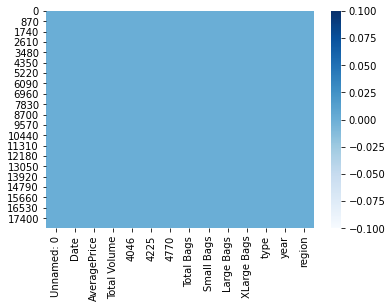

In [11]:
sns.heatmap(df.isnull(), cmap = 'Blues')  # Graphical representation of Non null dataset

## Data Preprocessing

In [12]:
df.head(2)

Unnamed: 0        Date  AveragePrice  Total Volume     4046      4225  \
0           0  2015-12-27          1.33      64236.62  1036.74  54454.85   
1           1  2015-12-20          1.35      54876.98   674.28  44638.81   

    4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0  48.16     8696.87     8603.62       93.25          0.0  conventional  2015   
1  58.33     9505.56     9408.07       97.49          0.0  conventional  2015   

   region  
0  Albany  
1  Albany

In [13]:
# we can see in the dtype of Date column is object, we need to convert this into date dtype
df['Date'].dtypes
# dtype('O')


dtype('O')

###### Changing Dtype of Date column from object dtype to Date type

In [14]:
df['Date'] = pd.to_datetime(df['Date']) # Changing Date column dtype

In [15]:
df.dtypes   # As we can see. now, dtype of Date column is Datetime

# Date            datetime64[ns]

Unnamed: 0               int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

##### Droping 'Unnamed: 0' column because it showing no use in the dataset

In [16]:
# As we can see Unnmaed:0 column is giving no use in the dataset, we should remove this column
df.drop(columns = ['Unnamed: 0'], inplace = True)
df.shape

# (18249, 13)

(18249, 13)

##### New Month column created from date column

In [17]:
df['Month'] = df['Date'].dt.month

In [18]:
df.shape

# (18249, 14)

(18249, 14)

In [19]:
df['Month'].unique()

# array([12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1], dtype=int64)

array([12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1], dtype=int64)

In [20]:
month_dict = {1:'Jan', 2:'Feb', 3: 'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

In [21]:
df['Month'] = df['Month'].replace(month_dict)

In [22]:
df['Month'].unique()

# array(['Dec', 'Nov', 'Oct', 'Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr',
#        'Mar', 'Feb', 'Jan'], dtype=object)

array(['Dec', 'Nov', 'Oct', 'Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr',
       'Mar', 'Feb', 'Jan'], dtype=object)

#####  "Observation year" created from date column

In [23]:
df['Observation Year'] = df['Date'].dt.year   # New 'year' column creating from 'Date' column

In [24]:
df['Observation Year'].value_counts()

# 2017    5722
# 2016    5616
# 2015    5615
# 2018    1296

2017    5722
2016    5616
2015    5615
2018    1296
Name: Observation Year, dtype: int64

In [25]:
df['year'].value_counts()

# 2017    5722
# 2016    5616
# 2015    5615
# 2018    1296

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

In [26]:
# we also can create new column of day but that will create more complexity in data

In [27]:
# We can see both year and observation year columns are same, therefore we can delete any one of them
# And now, all requisite information has been taken out from date column, now we can delete this columns too.

##### Deleting columns which are not necessary  

In [28]:
# Obseration year and year columns are same therefore we are delete year column
# Date: All information has been taken out Date column, now we can delete this column
df.drop(columns = ['year', 'Date'], inplace =  True)

In [29]:
df.shape

# (18249, 13)

(18249, 13)

In [30]:
df.dtypes

# AveragePrice        float64
# Total Volume        float64
# 4046                float64
# 4225                float64
# 4770                float64
# Total Bags          float64
# Small Bags          float64
# Large Bags          float64
# XLarge Bags         float64
# type                 object
# region               object
# Month                object
# Observation Year      int64

AveragePrice        float64
Total Volume        float64
4046                float64
4225                float64
4770                float64
Total Bags          float64
Small Bags          float64
Large Bags          float64
XLarge Bags         float64
type                 object
region               object
Month                object
Observation Year      int64
dtype: object

## Visualization

In [31]:
float_col =  df.select_dtypes(include = ['float64']).keys()  # all float64 dtype columns
float_col

# Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
#        'Small Bags', 'Large Bags', 'XLarge Bags'],
#       dtype='object')

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags'],
      dtype='object')

In [32]:
# categorical columns
cat_col =  df.select_dtypes(include = ['int64', 'object']).keys()   # All int64 and object type columns 
cat_col

# Index(['type', 'region', 'Month', 'Observation Year'], dtype='object')

Index(['type', 'region', 'Month', 'Observation Year'], dtype='object')

#### For categorical Features

In [33]:
for i in cat_col:
    print('__________________________________',i,'______________________________________')
    print(df[i].value_counts()  )

__________________________________ type ______________________________________
conventional    9126
organic         9123
Name: type, dtype: int64
__________________________________ region ______________________________________
Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville        

In [34]:
for i in cat_col:
    print(i, ' column, have unique value : ', df[i].nunique())
    
# type  column, have unique value :  2
# region  column, have unique value :  54
# Month  column, have unique value :  12
# Observation Year  column, have unique value :  4

type  column, have unique value :  2
region  column, have unique value :  54
Month  column, have unique value :  12
Observation Year  column, have unique value :  4


### Countplot

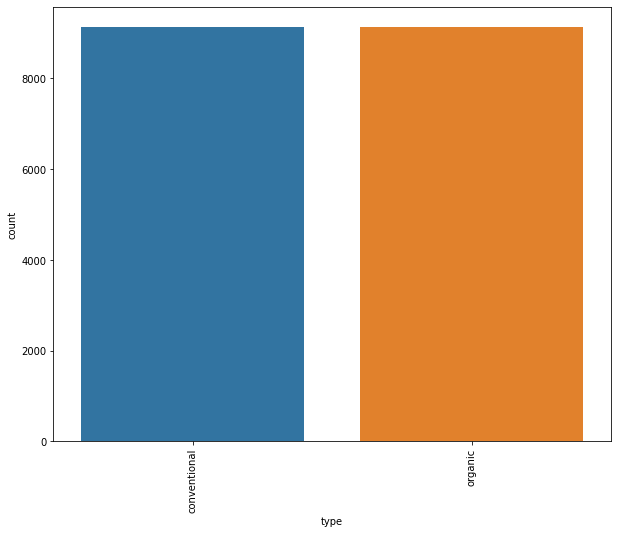

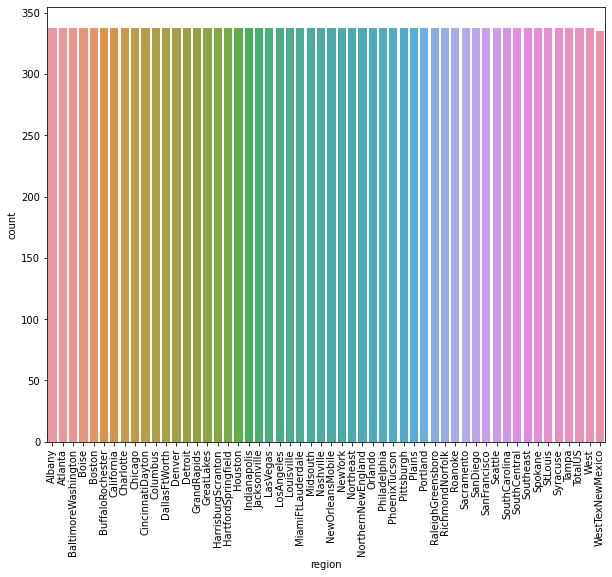

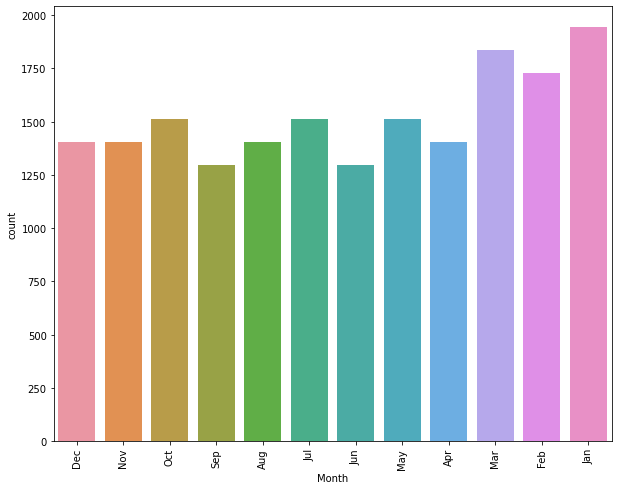

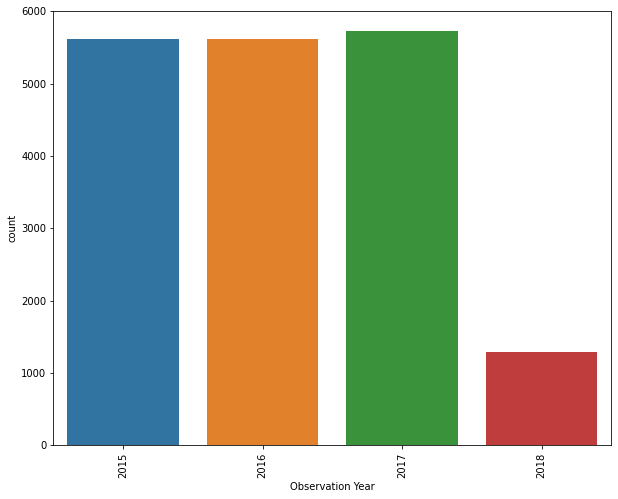

In [35]:
for i in cat_col:
    l = list(df[i].unique())
    plt.figure(figsize = (10, 8))
    countplot = sns.countplot(df[i])
    countplot.set_xticklabels(labels = l, rotation = 90)

In [36]:
# Coventional and orgnic class of 'type' feature are in equally distributed
# All class of region are balanced only West Test New mexico class need to balance as there is litle difference as observed
# Maxium obervation are taken in the month of sep and jun 
# Lease observation taken in month of Jun and Aug 
# Highlest obervation taken in 2017 year and least are taken in 2018

<AxesSubplot:xlabel='Observation Year', ylabel='count'>

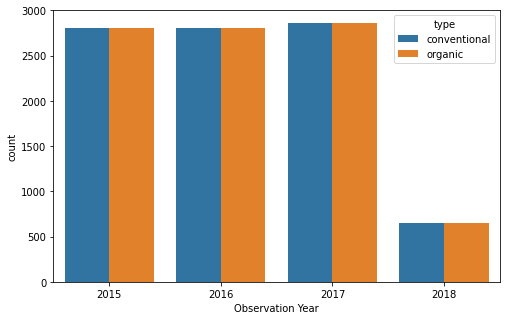

In [37]:
plt.figure(figsize = (8, 5))
sns.countplot(df['Observation Year'], hue = df['type'])

In [38]:
# Equal 'type' observation are taken in each year

<AxesSubplot:xlabel='Month', ylabel='count'>

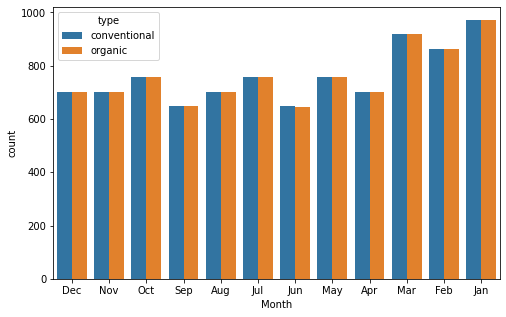

In [39]:
plt.figure(figsize = (8, 5))
sns.countplot(df['Month'], hue = df['type'])

In [40]:
# Equal 'type' observation are taken in each month

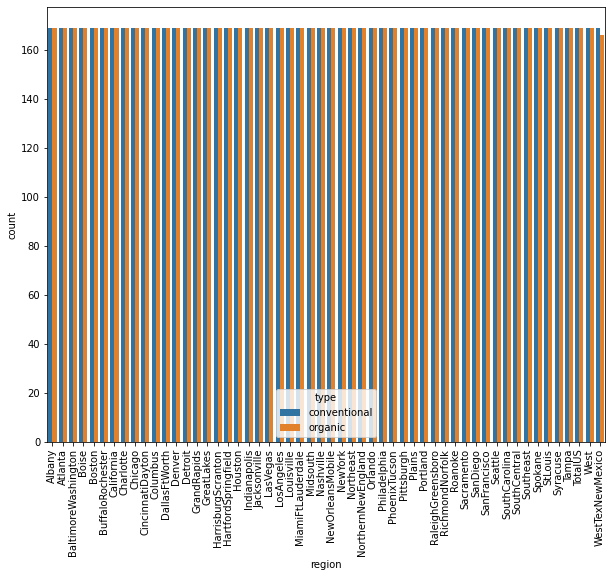

In [41]:
l = list(df['region'].unique())
plt.figure(figsize = (10, 8))
bar = sns.countplot(df['region'], hue = df['type'])
bar.set_xticklabels(labels = l, rotation = 90)
plt.show()

In [42]:
# region column is almost balance, only WestTestNewMaexico region have some less obervation for organic class of 
# 'type' variable

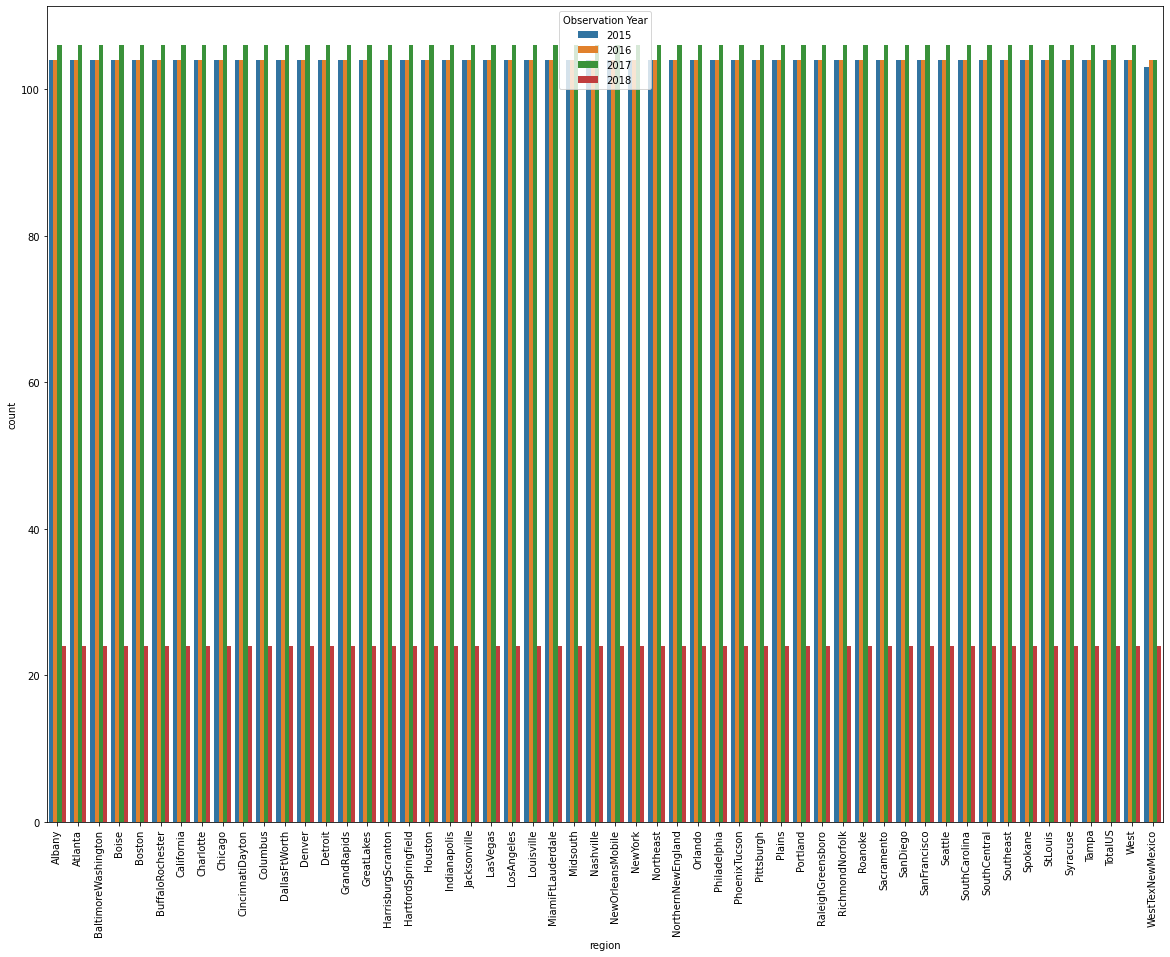

In [43]:
l = list(df['region'].unique())
plt.figure(figsize = (20, 15 ))
bar = sns.countplot(df['region'], hue = df['Observation Year'])
bar.set_xticklabels(labels = l, rotation = 90)
plt.show()

In [44]:
# least obverstion are present for the region in 2018
# And highest obervation are taken out from each region in 2017
# WestTestNewMexico region showing some difference as compare to other region 


###### Let have a look onto percentage using pie chart

<AxesSubplot:ylabel='region'>

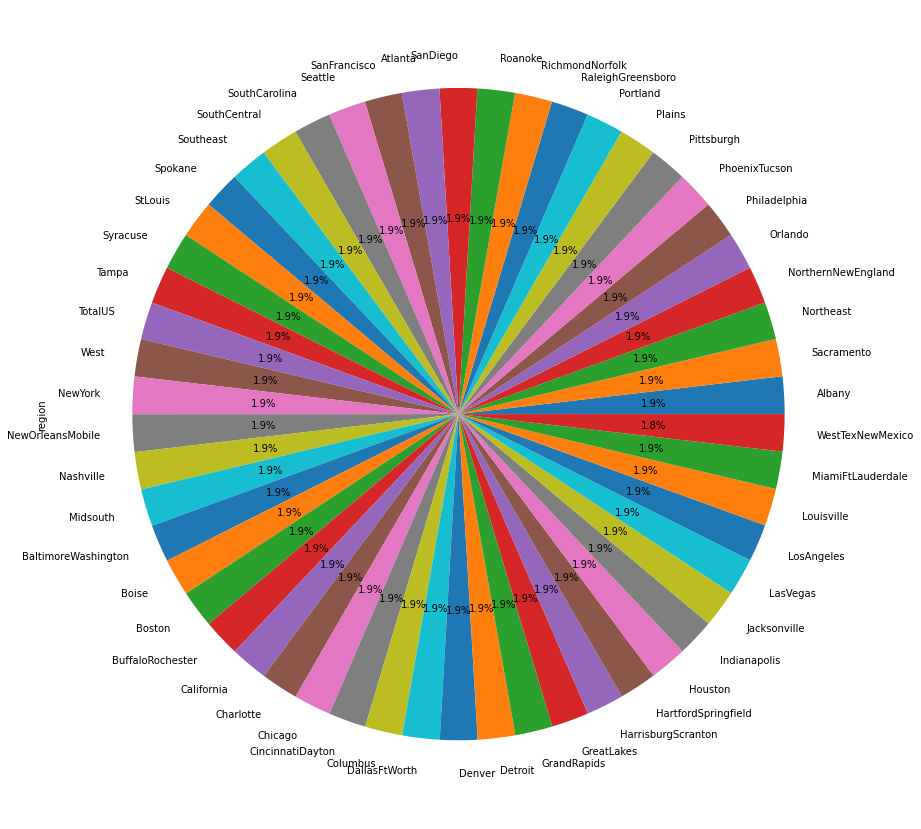

In [45]:
plt.figure(figsize = (20, 15))
df['region'].value_counts().plot(kind = 'pie', autopct = '%.1f%%')

In [46]:
# all regions showing obervation of 1.9 % except  MaxTextMexico region
# As imbalacny present in MaxTestMexico, it observation are of 1.8 %

<AxesSubplot:ylabel='Month'>

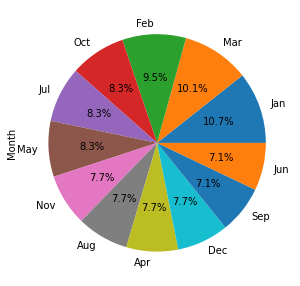

In [47]:
plt.figure(figsize = (8, 5))
df['Month'].value_counts().plot(kind = 'pie', autopct = '%.1f%%')

In [48]:
# highest percentage (10.7 %) of obervation are taken in jan month
# Least percentage of observation (7.1 %) are taken in jun and sep month

<AxesSubplot:ylabel='Observation Year'>

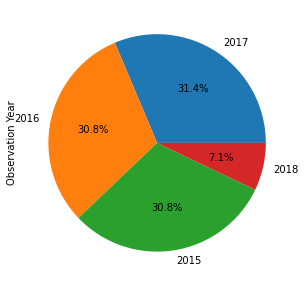

In [49]:
plt.figure(figsize = (8, 5))
df['Observation Year'].value_counts().plot(kind = 'pie', autopct = '%.1f%%')

In [50]:
# As we have already understood from above bar chart only 7.1% of observation are taken in 2018
# And maximum percentage of observation are taken in the 2017
# In the year of 2016 and 2015, eaqual percent observation are taken
# This chart is giving percentage review of 'observation year' column

In [51]:
cat_col

# Index(['type', 'region', 'Month', 'Observation Year'], dtype='object')

Index(['type', 'region', 'Month', 'Observation Year'], dtype='object')

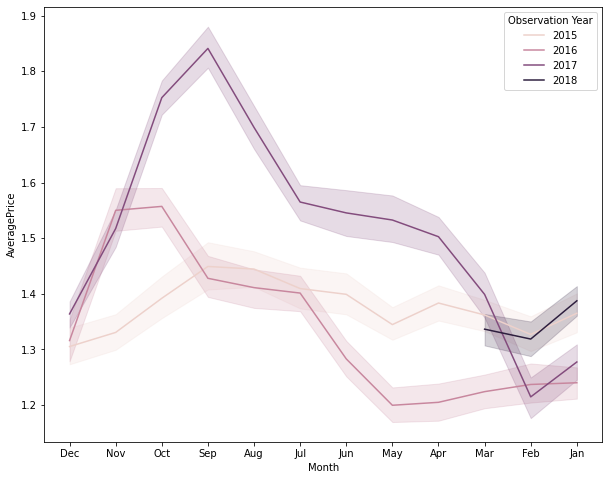

In [52]:
plt.figure(figsize = (10, 8))
sns.lineplot(x = 'Month', y = 'AveragePrice', data = df, hue = 'Observation Year')
plt.show()

In [53]:
# In each year, Feb is of least sell product month, and Beteewn oct to sep , sales increasing
# Bussines need to focus on other months also

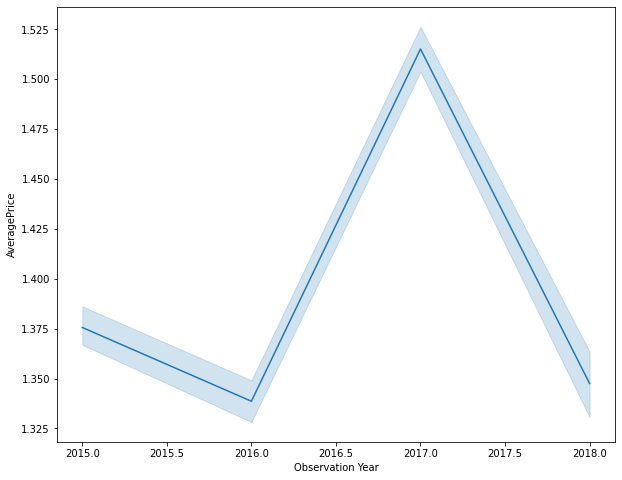

In [54]:
plt.figure(figsize = (10, 8))
sns.lineplot(x = 'Observation Year', y = 'AveragePrice', data = df)
plt.show()

In [55]:
# in the above graph, avgprice is highest at 2017 year and least at 2016

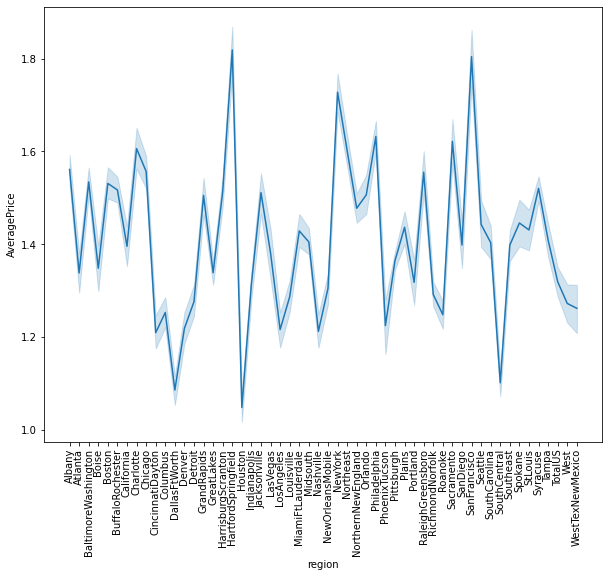

In [56]:
plt.figure(figsize = (10, 8))
l = list(df['region'].unique())
ax = sns.lineplot(x = 'region', y = 'AveragePrice', data = df)
ax.set_xticklabels(labels = l, rotation = 90)
# plt.show()
plt.show()

In [57]:
# Region wise avgprice prediction, 
# least at southCentral and Houston
# maximum at HartfordSpringfield
# avg prices are varyiing, in different different regions

### For float type features

In [58]:
float_col

# Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
#        'Small Bags', 'Large Bags', 'XLarge Bags'],
#       dtype='object')

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags'],
      dtype='object')

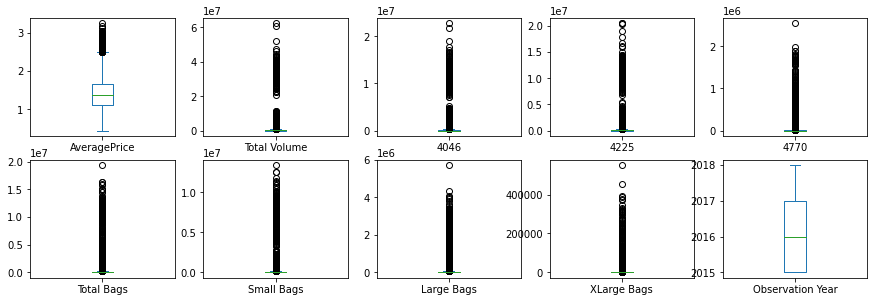

In [59]:
df.plot(kind = 'box', subplots = True, layout = (4, 5 ), figsize = (15, 10))
plt.show()

##### Checking outliers

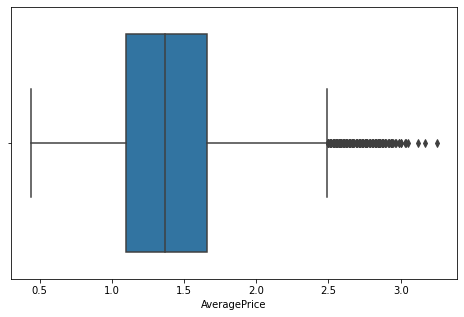

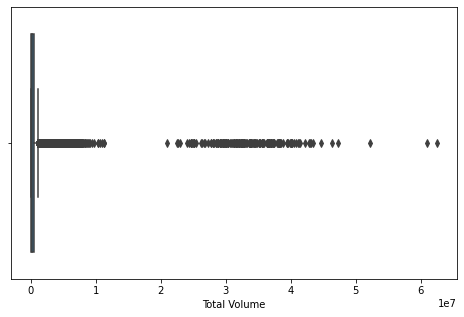

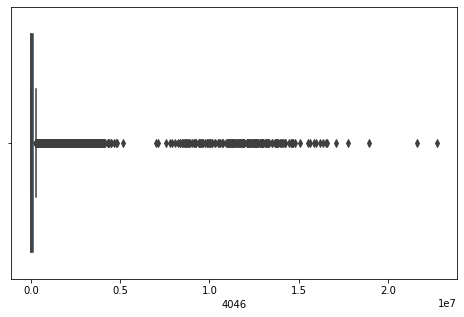

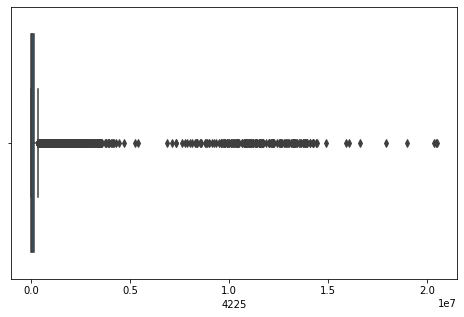

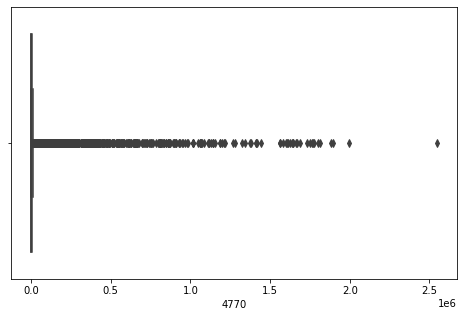

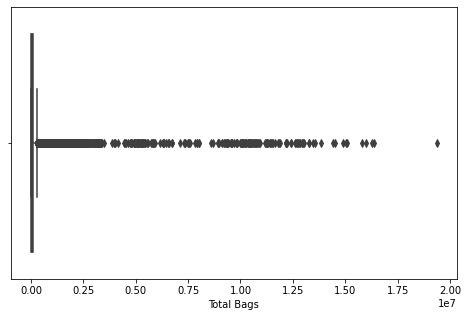

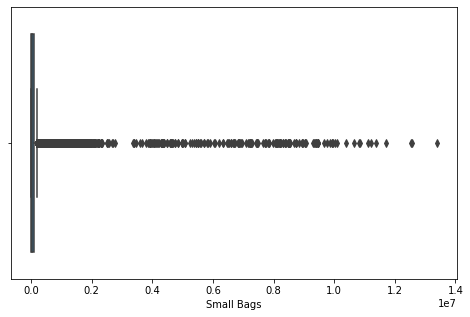

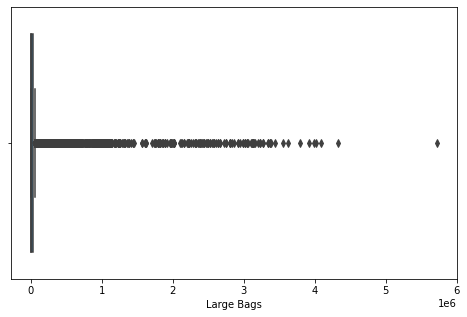

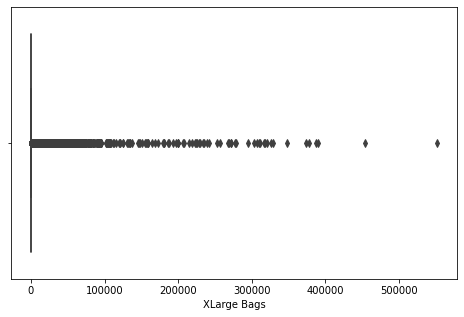

In [60]:
for i in float_col:
    plt.figure(figsize = (8, 5))
    sns.boxplot(df[i])

In [61]:
# So many outliers are present in the dataset, execpt  AveragePrice column
# Average price column is also having outlier but as compare to other columns it is less.
# need to work on it

## Checking Skewness

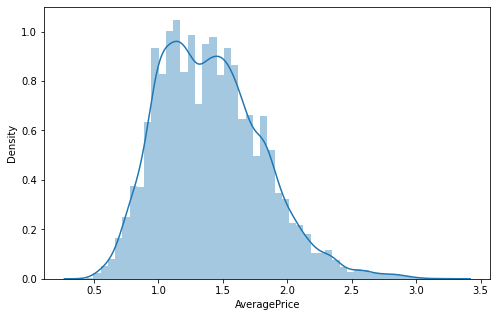

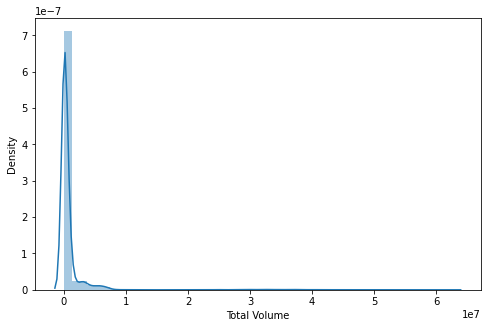

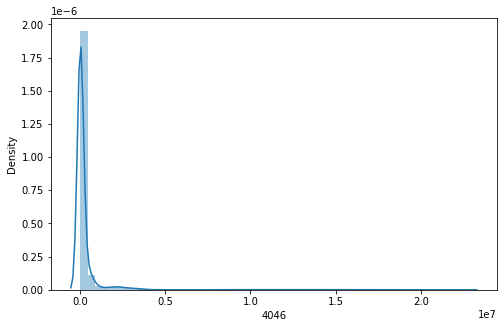

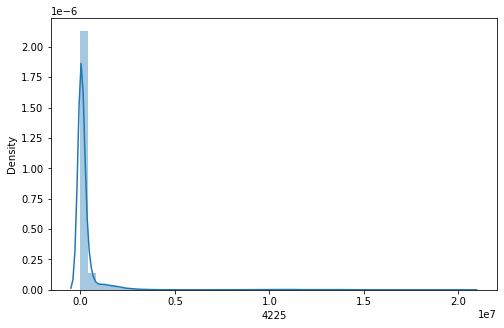

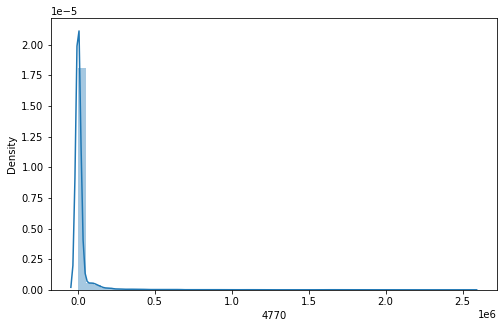

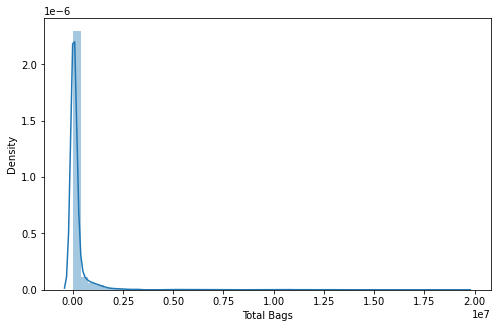

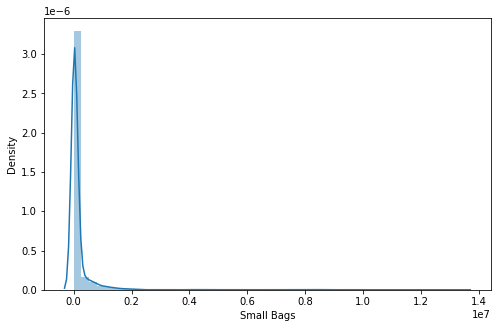

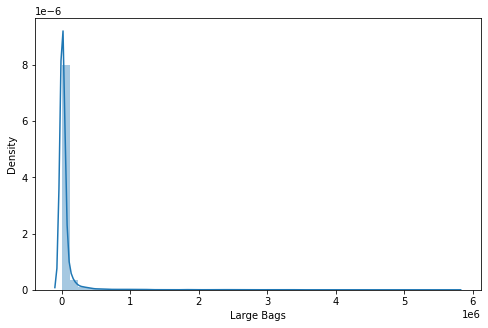

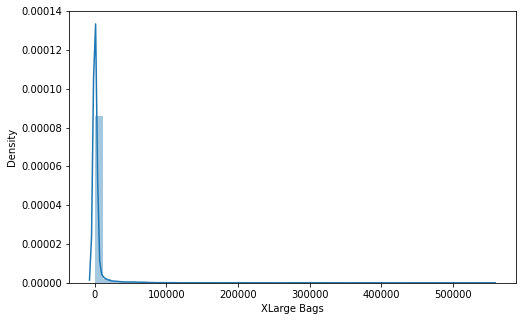

In [62]:
for i in float_col:
    plt.figure(figsize = (8,5))
    sns.distplot(df[i])

In [63]:
# Averageprice column is seems with little bit right skewed
# other than Averageprice column, every column is highly skewed
# All rest columns are shwoing high left skewness, 
# Need to work on it, after removing outliers

### Distribution of Columns

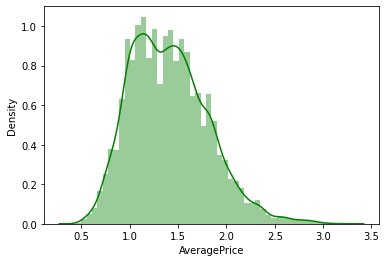

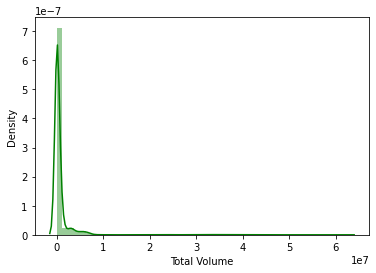

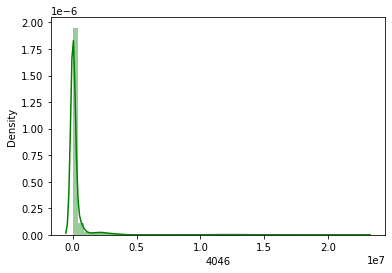

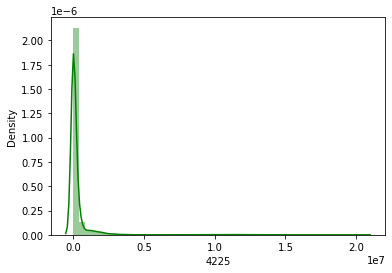

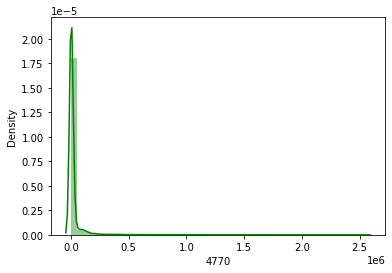

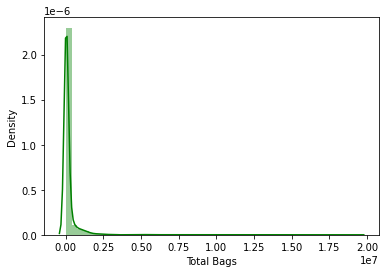

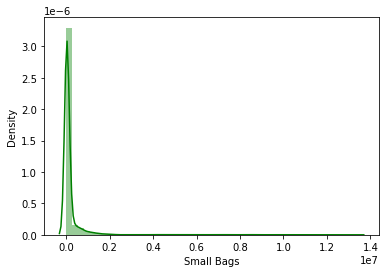

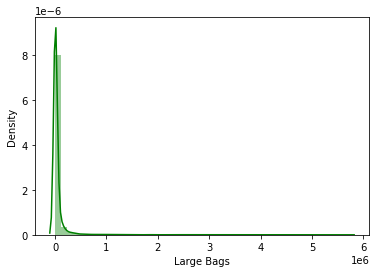

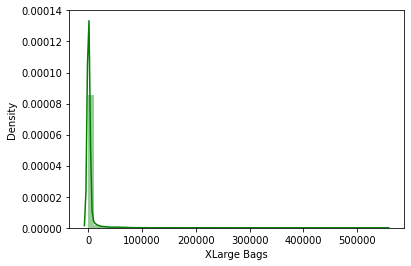

In [64]:
for i in float_col:
    plt.figure()
    sns.distplot(df[i], kde = True, color = 'g')

In [65]:
# As every columns is showing high right skewness except Average Price Columns, therefore data is not much normally distributed
# AveragePrice column is almost normally distributed, 
# Need to work on it.

##### Spread of columns

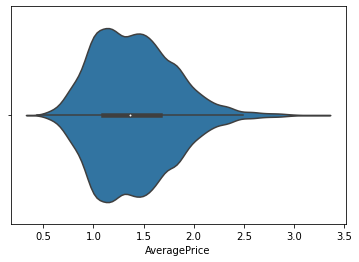

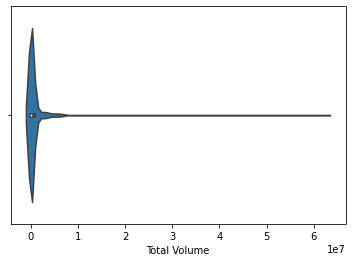

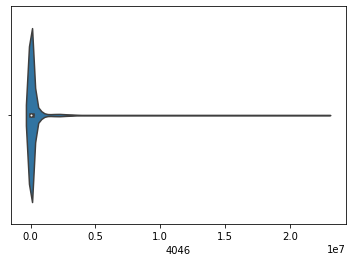

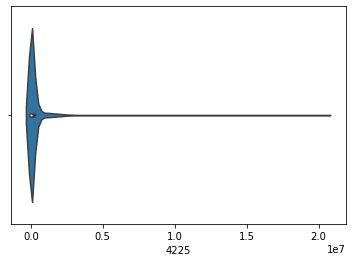

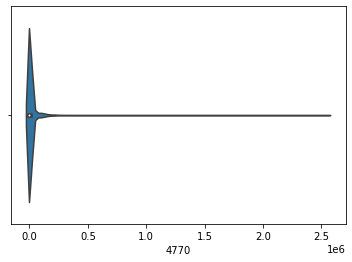

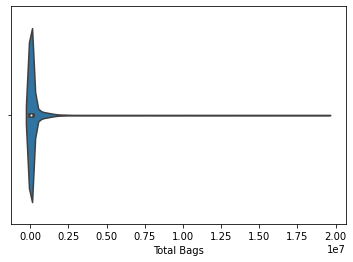

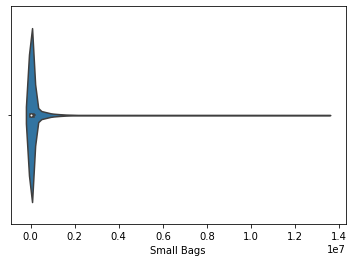

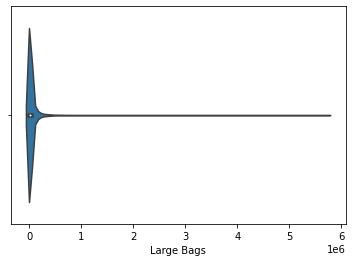

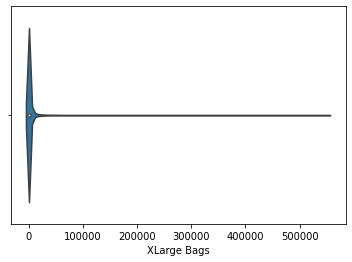

In [66]:
for i in float_col:    
    plt.figure()
    sns.violinplot(df[i], orient = 'vertical')

In [67]:
# AveragePrice is well spreaded
# Other than AveragePrice column, everycolumn is spreaded but not in high range
# We will look on spread of column after removing outlier from it.

##### Knowing pattern of float type features

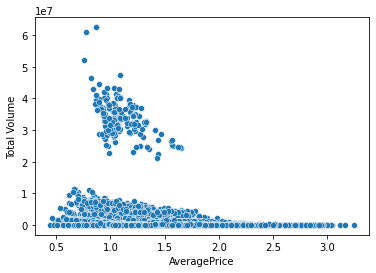

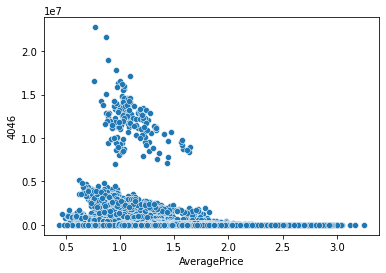

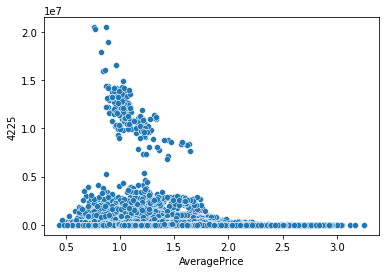

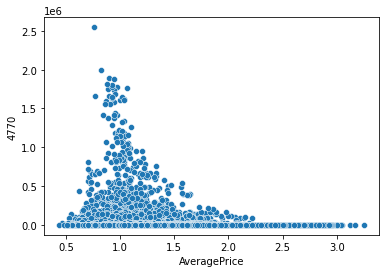

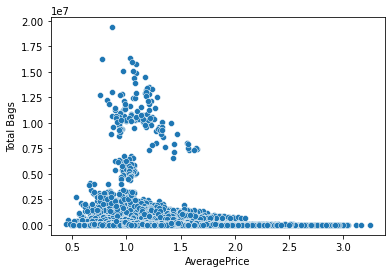

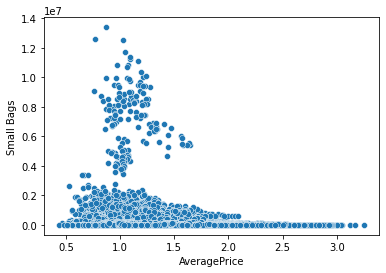

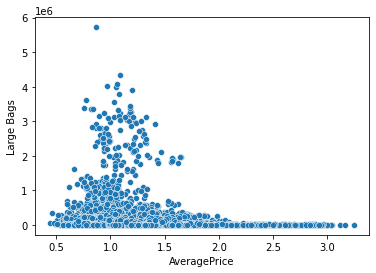

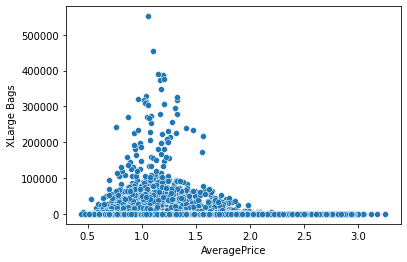

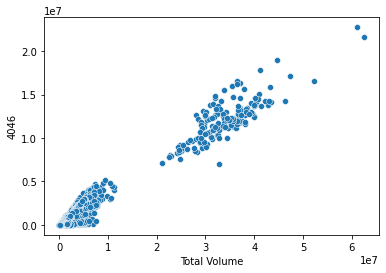

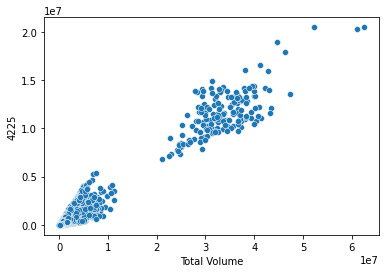

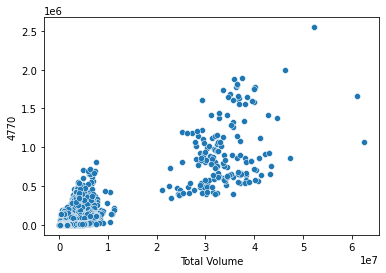

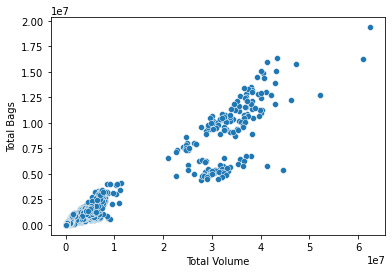

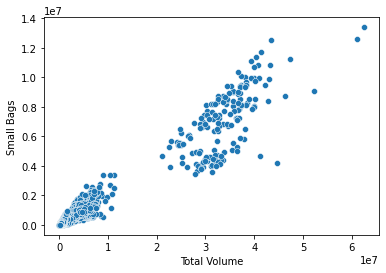

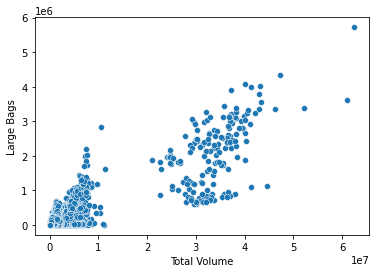

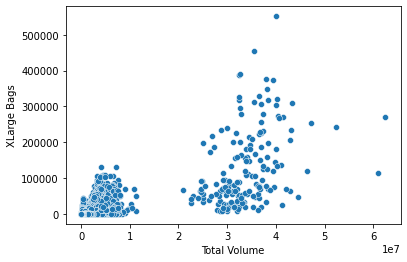

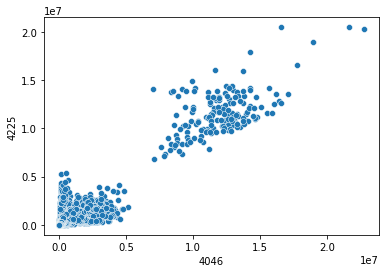

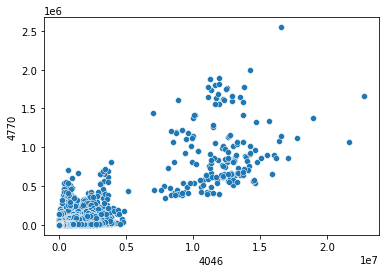

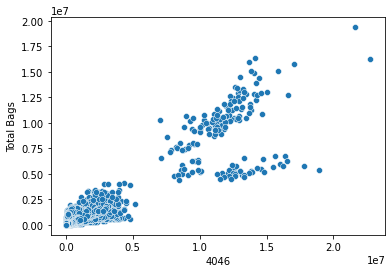

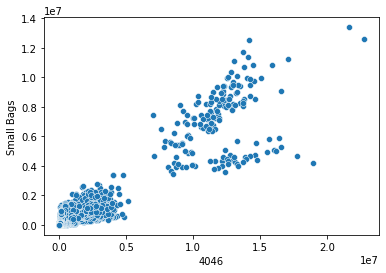

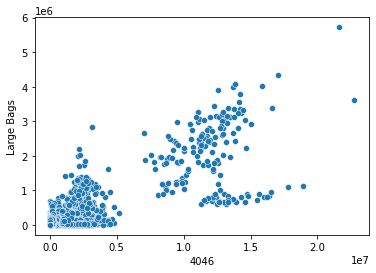

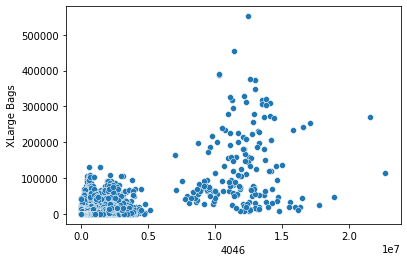

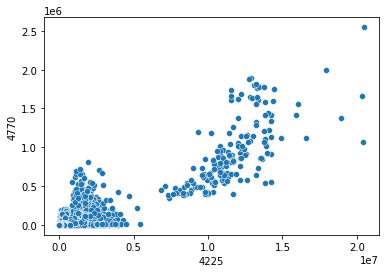

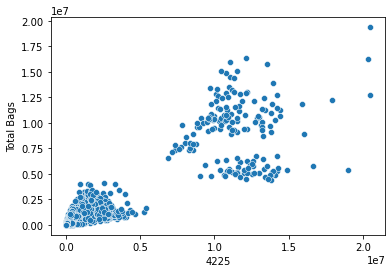

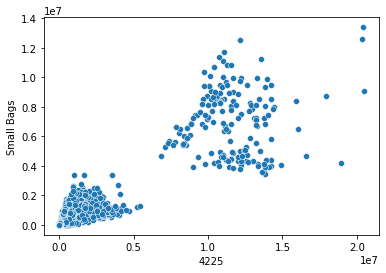

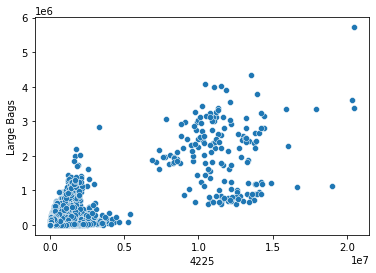

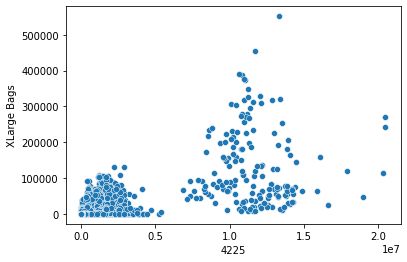

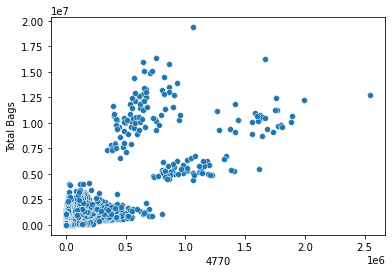

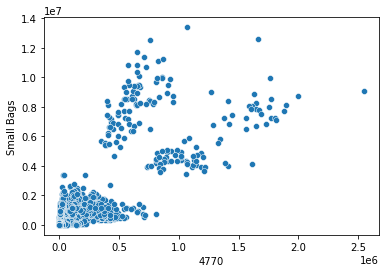

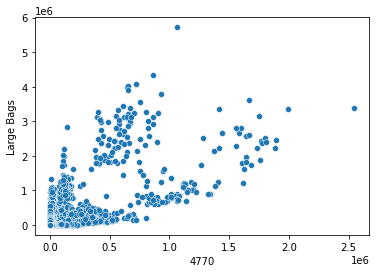

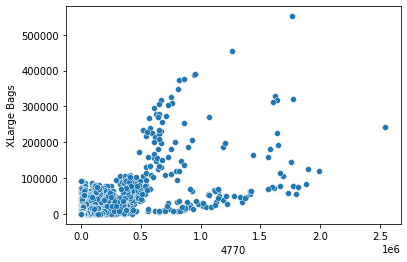

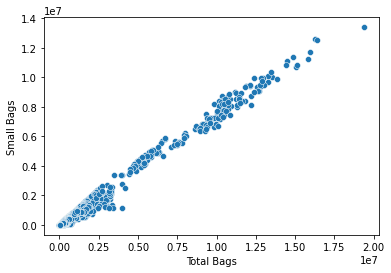

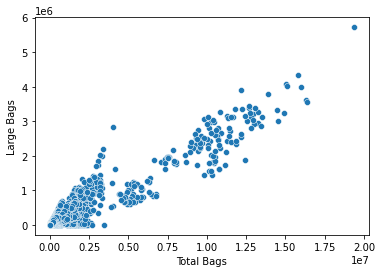

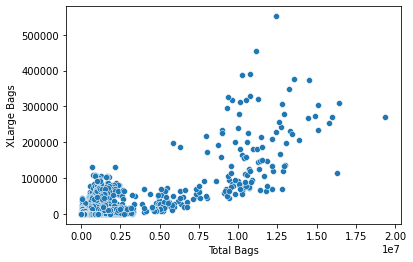

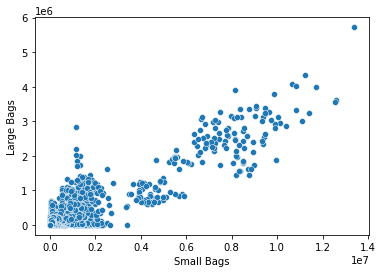

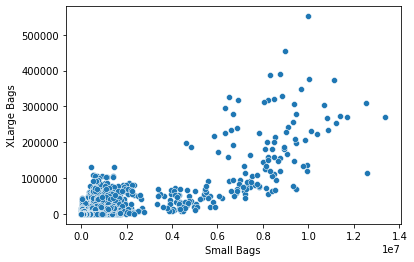

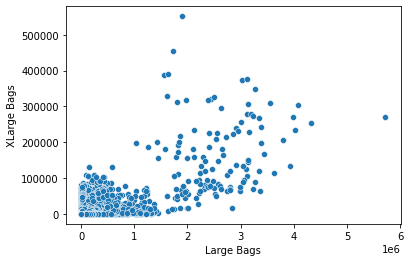

In [68]:
for i in range(len(float_col)):

    for j in float_col[i+1:]:    
        plt.figure()
        sns.scatterplot(df[float_col[i]], df[j])
        

In [69]:

# 4046 and Total Volume are showing positive linearity 
# 4225 and total volume are showing positive linearity 
# 4770 and total volume are showing positive linearity 
# Large Bags and Total voume  are showing positive linearity 

# Small bags is showing complete linear relation with total bag column
# Large Bags and Total Bags are showing postive linearity
# Large bags and small bags are also showing positive linearity

##### for AveragePrice column point of you

In [70]:
# As we see no any specific pattern found for AveragePrice column with other columns

##### For region column point of view

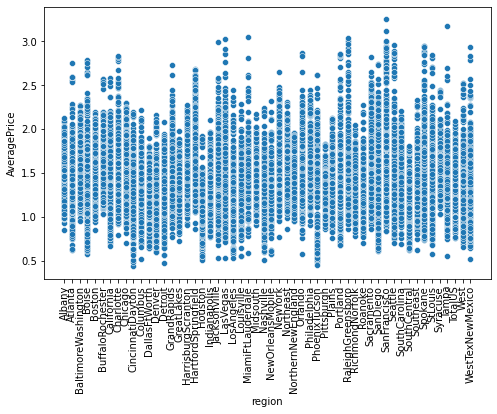

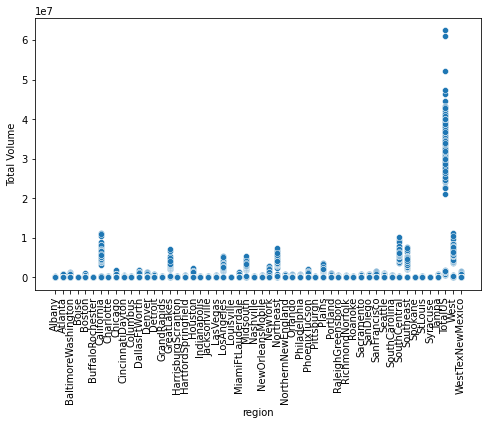

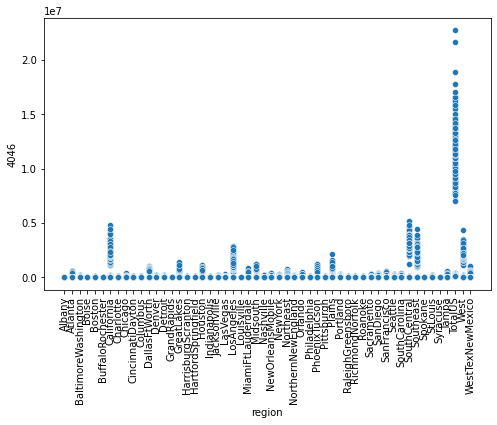

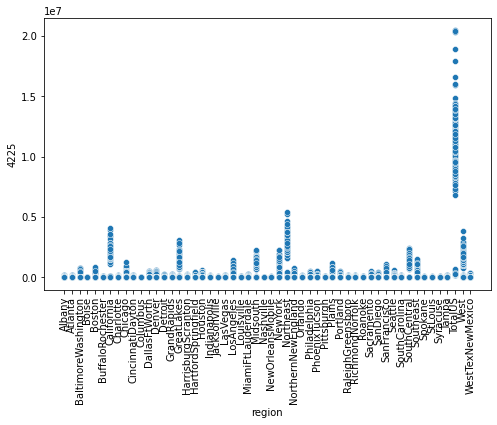

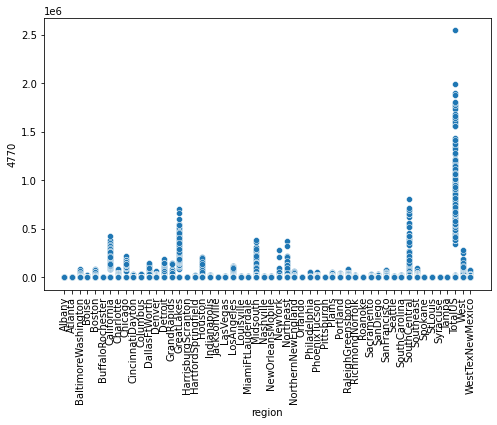

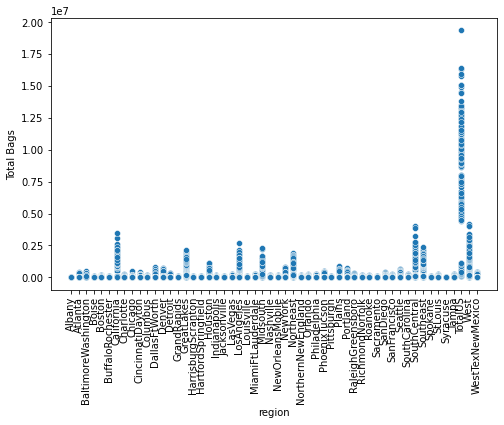

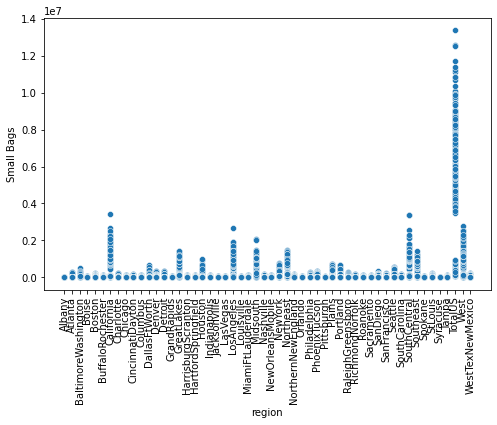

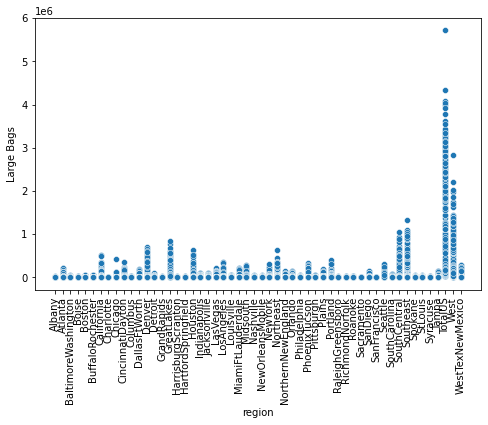

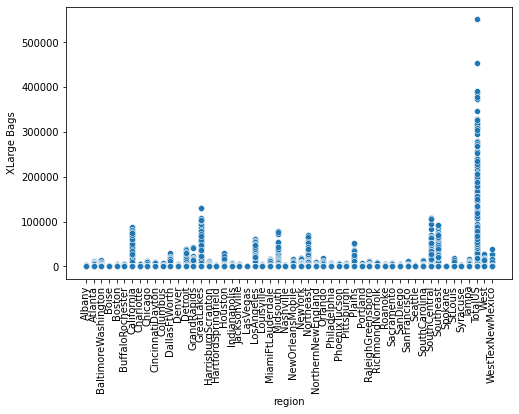

In [71]:
for i in float_col:
    l = df['region'].unique()
    plt.figure(figsize = (8, 5))
    scat = sns.scatterplot(df['region'], df[i])
    scat.set_xticklabels(labels = l, rotation = 90)
    plt.show()
# scat.x

# # l = list(df['region'].unique())
# plt.figure(figsize = (10, 8))
# bar = sns.countplot(df['region'], hue = df['type'])
# bar.set_xticklabels(labels = l, rotation = 90)
# plt.show()

In [72]:
# Not as such any pattern found, 
# Only TotalUS column is showing different behaviour as compare to other float type columns

##### Changing the Year column Type

In [73]:
df['Observation Year'].unique()

# array([2015, 2016, 2017, 2018], dtype=int64)

array([2015, 2016, 2017, 2018], dtype=int64)

In [74]:
df['Observation Year'] = df['Observation Year'].astype('object')  
# Converting Observation Year column dtype from int to object

In [75]:
df.dtypes

# AveragePrice        float64
# Total Volume        float64
# 4046                float64
# 4225                float64
# 4770                float64
# Total Bags          float64
# Small Bags          float64
# Large Bags          float64
# XLarge Bags         float64
# type                 object
# region               object
# Month                object
# Observation Year     object

AveragePrice        float64
Total Volume        float64
4046                float64
4225                float64
4770                float64
Total Bags          float64
Small Bags          float64
Large Bags          float64
XLarge Bags         float64
type                 object
region               object
Month                object
Observation Year     object
dtype: object

### Correlation of the columns

In [76]:
df.corr()

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.192752 -0.208317 -0.172928 -0.179446   
Total Volume     -0.192752      1.000000  0.977863  0.974181  0.872202   
4046             -0.208317      0.977863  1.000000  0.926110  0.833389   
4225             -0.172928      0.974181  0.926110  1.000000  0.887855   
4770             -0.179446      0.872202  0.833389  0.887855  1.000000   
Total Bags       -0.177088      0.963047  0.920057  0.905787  0.792314   
Small Bags       -0.174730      0.967238  0.925280  0.916031  0.802733   
Large Bags       -0.172940      0.880640  0.838645  0.810015  0.698471   
XLarge Bags      -0.117592      0.747157  0.699377  0.688809  0.679861   

              Total Bags  Small Bags  Large Bags  XLarge Bags  
AveragePrice   -0.177088   -0.174730   -0.172940    -0.117592  
Total Volume    0.963047    0.967238    0.880640     0.747157  
4046            0.920057    0.925280    0.838645     0.699377  
4225            0.905787    0.916031    0.810015     0.688809  
4770            0.792314    0.802733    0.698471     0.679861  
Total Bags      1.000000    0.994335    0.943009     0.804233  
Small Bags      0.994335    1.000000    0.902589     0.806845  
Large Bags      0.943009    0.902589    1.000000     0.710858  
XLarge Bags     0.804233    0.806845    0.710858     1.000000

<AxesSubplot:>

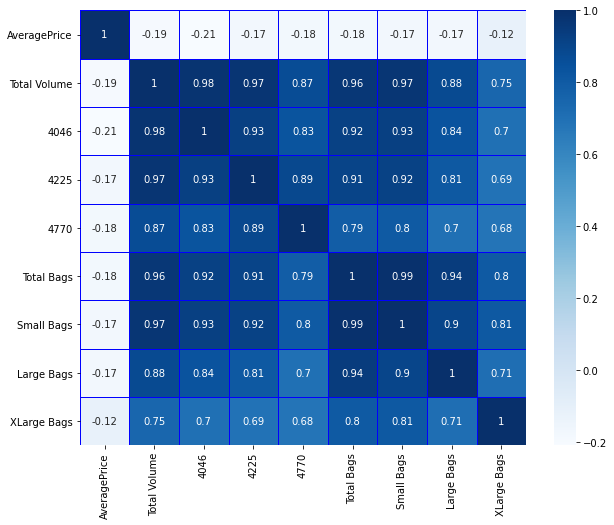

In [77]:
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues', linewidth = 0.5, linecolor = 'blue' )   # Heatmap with number, 

In [78]:
# Total volumne and 4046 column is showing high correlation
# Total Volumne and 4225 column is showing high correlation
# In short Total volumne is showing with high correlation with maximum columns
# 4046, 4225 and 4770 are are showing high correlation with each other
# Total Bags and Small Bags are showing high correlation with almost every column except observation year

### Describe Data

In [79]:
df.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags  
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507  
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652  
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000  
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000  
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000  
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000  
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000

<AxesSubplot:>

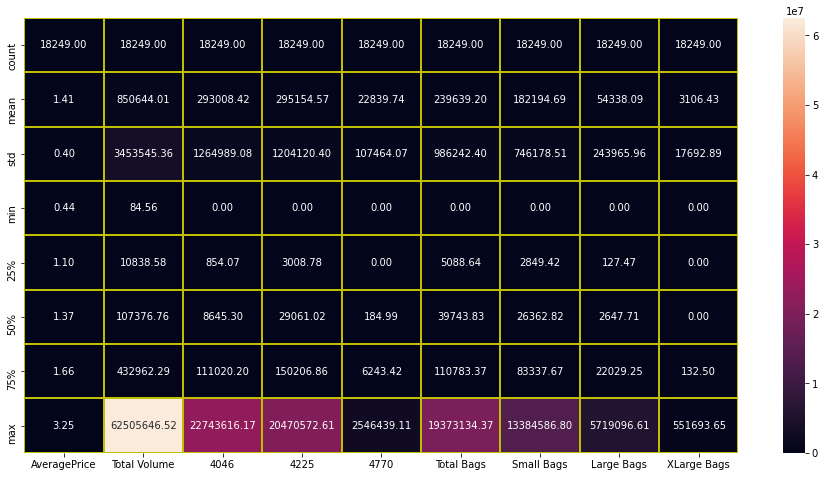

In [80]:
plt.figure(figsize = (16, 8))
sns.heatmap(df.describe(), annot = True, linewidth = 0.05, linecolor = 'y', fmt = "0.2f")

In [81]:
# Total volumne, 4046, 4225, 4770, Total bags, Small Bags, Large Bags and XLarge Bags columns are showing high difference 
# Between mean and 50 Percentile, which is telling that these columns are having outliers

# AveragePrice column is not much difference between mean and 50 percentile
# AveragePrice

##  ________Considering  AveragePrice as Target and rest columns as feature__________

### Checking the columns contribution to predict target

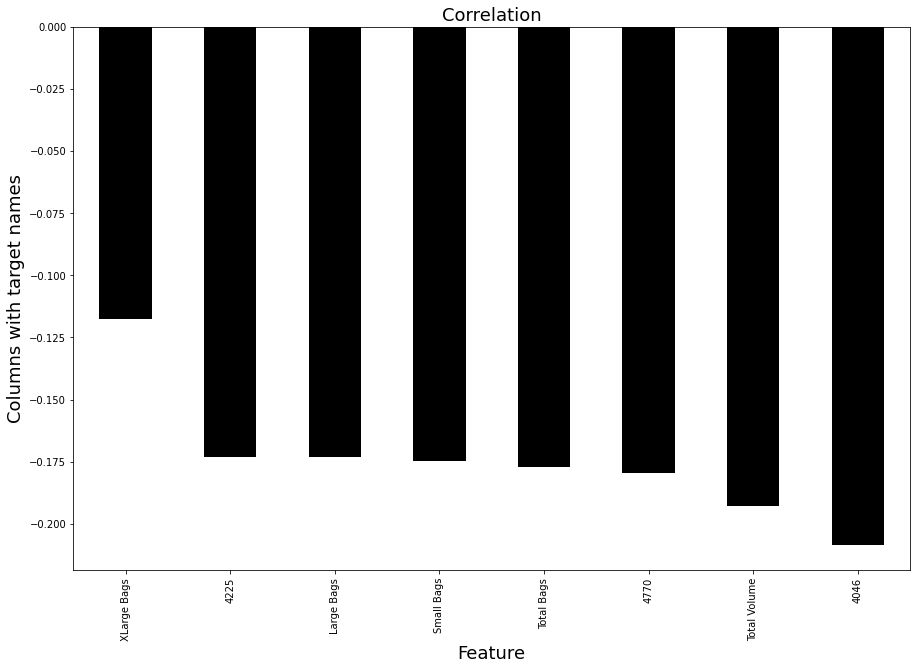

In [82]:
plt.figure(figsize = (15, 10))
df.corr()['AveragePrice'].sort_values(ascending = False).drop(['AveragePrice']).plot(kind = 'bar', color = 'black')
plt.xlabel( 'Feature', fontsize = 18)
plt.ylabel( 'Columns with target names', fontsize = 18)
plt.title ('Correlation', fontsize = 18)
plt.show()

In [83]:
# All columns are contributing highly with negatively axis to predict AveragePrice 

In [84]:
# sns.pairplot(df)

In [85]:
# We can see, maximum columns are showing linearity with each other

## Encoding

In [86]:
cat_col

# Index(['type', 'region', 'Month', 'Observation Year'], dtype='object')

Index(['type', 'region', 'Month', 'Observation Year'], dtype='object')

In [87]:
df.dtypes

# AveragePrice        float64
# Total Volume        float64
# 4046                float64
# 4225                float64
# 4770                float64
# Total Bags          float64
# Small Bags          float64
# Large Bags          float64
# XLarge Bags         float64
# type                 object
# region               object
# Month                object
# Observation Year     object

AveragePrice        float64
Total Volume        float64
4046                float64
4225                float64
4770                float64
Total Bags          float64
Small Bags          float64
Large Bags          float64
XLarge Bags         float64
type                 object
region               object
Month                object
Observation Year     object
dtype: object

In [88]:
for i in cat_col:
    print('_____________________', i, ' Column___________________')
    print(df[i].value_counts())
    print('\n')
    
    # count of each column classes , for reference only

_____________________ type  Column___________________
conventional    9126
organic         9123
Name: type, dtype: int64


_____________________ region  Column___________________
Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWa

In [89]:
for i in cat_col:
    print(i, ' column have ', len(df[i].unique() ), 'unique values' )

# type  column have  2 unique values
# region  column have  54 unique values
# Month  column have  12 unique values
# Observation Year  column have  4 unique values

type  column have  2 unique values
region  column have  54 unique values
Month  column have  12 unique values
Observation Year  column have  4 unique values


In [90]:
# As observed from above visualization 
# Obervation Year, Month, type, region on these column we are applying OneHotEncoder
# This encoder technique are selected as per my experience on multiple projects

#### OntHotEncoder

In [91]:
df1 = pd.get_dummies(df, columns = ['type', 'Month', 'Observation Year', 'region']) 

# OneHotEncoding

In [92]:
df1.shape
# 
# (18249, 81)

(18249, 81)

In [93]:
cat_col  
# Index(['type', 'region', 'Month', 'Observation Year'], dtype='object')

Index(['type', 'region', 'Month', 'Observation Year'], dtype='object')

In [94]:
df1.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  type_conventional  type_organic  \
0     8603.62       93.25          0.0                  1             0   
1     9408.07       97.49          0.0                  1             0   
2     8042.21      103.14          0.0                  1             0   
3     5677.40      133.76          0.0                  1             0   
4     5986.26      197.69          0.0                  1             0   

   Month_Apr  Month_Aug  Month_Dec  Month_Feb  Month_Jan  Month_Jul  \
0          0          0          1          0          0          0   
1          0          0          1          0          0          0   
2          0          0          1          0          0          0   
3          0          0          1          0          0          0   
4          0          0          0          0          0          0   

   Month_Jun  Month_Mar  Month_May  Month_Nov  Month_Oct  Month_Sep  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          1          0          0   

   Observation Year_2015  Observation Year_2016  Observation Year_2017  \
0                      1                      0                      0   
1                      1                      0                      0   
2                      1                      0                      0   
3                      1                      0                      0   
4                      1                      0                      0   

   Observation Year_2018  region_Albany  region_Atlanta  \
0                      0              1               0   
1                      0              1               0   
2                      0              1               0   
3                      0              1               0   
4                      0              1               0   

   region_BaltimoreWashington  region_Boise  region_Boston  \
0                           0             0              0   
1                           0             0              0   
2                           0             0              0   
3                           0             0              0   
4                           0             0              0   

   region_BuffaloRochester  region_California  region_Charlotte  \
0                        0                  0                 0   
1                        0                  0                 0   
2                        0                  0                 0   
3                        0                  0                 0   
4                        0                  0                 0   

   region_Chicago  region_CincinnatiDayton  region_Columbus  \
0               0                        0                0   
1               0                        0                0   
2               0                        0                0   
3               0                        0                0   
4               0                        0                0   

   region_DallasFtWorth  region_Denver  region_Detroit  region_GrandRapids  \
0                     0              0               0                   0   
1                     0              0               0                   0   
2                     0              0               0                

In [95]:
df1.dtypes

# AveragePrice                  float64
# Total Volume                  float64
# 4046                          float64
# 4225                          float64
# 4770                          float64
# Total Bags                    float64
# Small Bags                    float64
# Large Bags                    float64
# XLarge Bags                   float64
# type_conventional               uint8
# Other columns are of uint8 type

AveragePrice                  float64
Total Volume                  float64
4046                          float64
4225                          float64
4770                          float64
Total Bags                    float64
Small Bags                    float64
Large Bags                    float64
XLarge Bags                   float64
type_conventional               uint8
type_organic                    uint8
Month_Apr                       uint8
Month_Aug                       uint8
Month_Dec                       uint8
Month_Feb                       uint8
Month_Jan                       uint8
Month_Jul                       uint8
Month_Jun                       uint8
Month_Mar                       uint8
Month_May                       uint8
Month_Nov                       uint8
Month_Oct                       uint8
Month_Sep                       uint8
Observation Year_2015           uint8
Observation Year_2016           uint8
Observation Year_2017           uint8
Observation 

### Outlier Removing Techniques

#### 1. Try zscore technique

In [96]:
from scipy.stats import zscore

In [97]:
z = np.abs(zscore(df1) )
df1_z = df1[(z < 3).all(axis = 1)] 
df1_z.shape

# (0, 81)

(0, 81)

In [98]:
(df.shape[0] - df1_z.shape[0] ) / df.shape[0]

#  1.0  (100 percent data loss we are getting by this method)

1.0

In [99]:
# We are getting so high data loss, therefore we can not consider this technique for removing outliers

#### 2. IQR Technique

In [100]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1 

In [101]:
df1_IQR = df1[~((df1 < (Q1 - 1.5*IQR) ) | (df1 > (Q3 + 1.5*IQR) )).any(axis = 1) ] 
df1_IQR.shape 
# (0, 81)

(0, 81)

In [102]:
# We are getting 100% dataloss

In [103]:
# Hence both methods are giving so high data loss, therefore we will leave data as it is

In [104]:
df1.shape

# (18249, 81)

(18249, 81)

### Seperating dataset into x1 and y1 form

In [105]:
x1 = df1.drop(columns= ['AveragePrice'])
y1 = df1['AveragePrice']

print('shape of test', x1.shape)
print('shape of y', y1.shape)

shape of test (18249, 80)
shape of y (18249,)


In [106]:
x1.dtypes

# Total Volume                  float64
# 4046                          float64
# 4225                          float64
# 4770                          float64
# Total Bags                    float64
# Small Bags                    float64
# Large Bags                    float64
# XLarge Bags                   float64
# type_conventional               uint8
# Other columns are of uint8 type

Total Volume                  float64
4046                          float64
4225                          float64
4770                          float64
Total Bags                    float64
Small Bags                    float64
Large Bags                    float64
XLarge Bags                   float64
type_conventional               uint8
type_organic                    uint8
Month_Apr                       uint8
Month_Aug                       uint8
Month_Dec                       uint8
Month_Feb                       uint8
Month_Jan                       uint8
Month_Jul                       uint8
Month_Jun                       uint8
Month_Mar                       uint8
Month_May                       uint8
Month_Nov                       uint8
Month_Oct                       uint8
Month_Sep                       uint8
Observation Year_2015           uint8
Observation Year_2016           uint8
Observation Year_2017           uint8
Observation Year_2018           uint8
region_Alban

### Removing Skewness

In [107]:
x1.skew()

# Total Volume                   9.007687
# 4046                           8.648220
# 4225                           8.942466
# 4770                          10.159396
# Total Bags                     9.756072
# Small Bags                     9.540660
# Large Bags                     9.796455
# XLarge Bags                   13.139751

# We need to remove these columns skewness from dataset

Total Volume                   9.007687
4046                           8.648220
4225                           8.942466
4770                          10.159396
Total Bags                     9.756072
Small Bags                     9.540660
Large Bags                     9.796455
XLarge Bags                   13.139751
type_conventional             -0.000329
type_organic                   0.000329
Month_Apr                      3.175353
Month_Aug                      3.175353
Month_Dec                      3.176802
Month_Feb                      2.768866
Month_Jan                      2.551008
Month_Jul                      3.026762
Month_Jun                      3.343791
Month_Mar                      2.655666
Month_May                      3.026762
Month_Nov                      3.175353
Month_Oct                      3.026762
Month_Sep                      3.340554
Observation Year_2015          0.833423
Observation Year_2016          0.833145
Observation Year_2017          0.803834


In [108]:
# As we can see every float column is showing high skewness which is of right skewness
# Therefore we need to apply skew removing techniques to it

In [109]:
skewed_col = ['Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags']

In [110]:
from sklearn.preprocessing import PowerTransformer   
pt = PowerTransformer()

In [111]:
x1[skewed_col] = pt.fit_transform(x1[skewed_col])

In [112]:
x1.skew()

# Total Volume                  0.011171
# 4046                         -0.022679
# 4225                         -0.017740
# 4770                          0.032184
# Total Bags                   -0.001626
# Small Bags                    0.007058
# Large Bags                   -0.073809
# XLarge Bags                   0.793520

# We can see, now these columns skewness is in acceptable range for machin learning model building

Total Volume                  0.011171
4046                         -0.022679
4225                         -0.017740
4770                          0.032184
Total Bags                   -0.001626
Small Bags                    0.007058
Large Bags                   -0.073809
XLarge Bags                   0.793520
type_conventional            -0.000329
type_organic                  0.000329
Month_Apr                     3.175353
Month_Aug                     3.175353
Month_Dec                     3.176802
Month_Feb                     2.768866
Month_Jan                     2.551008
Month_Jul                     3.026762
Month_Jun                     3.343791
Month_Mar                     2.655666
Month_May                     3.026762
Month_Nov                     3.175353
Month_Oct                     3.026762
Month_Sep                     3.340554
Observation Year_2015         0.833423
Observation Year_2016         0.833145
Observation Year_2017         0.803834
Observation Year_2018    

In [113]:
# Now, we can see, all float type columns which was showing high skewness now they are showing, skewness
# which is in acceptable for model building

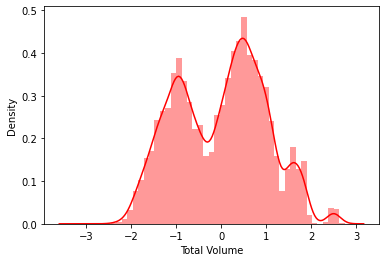

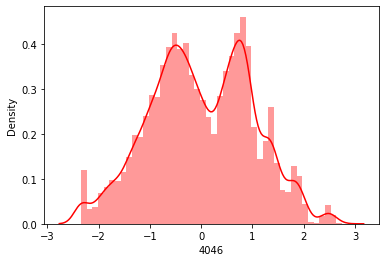

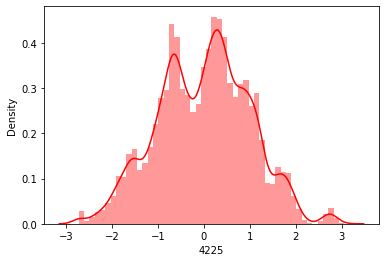

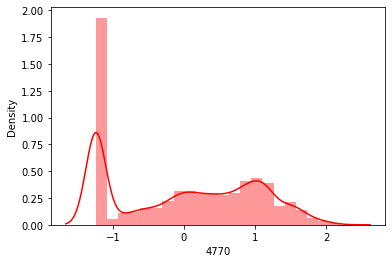

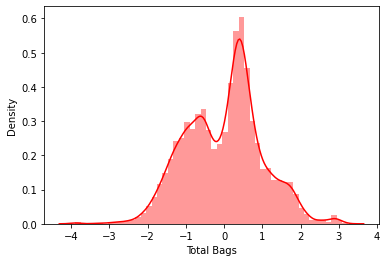

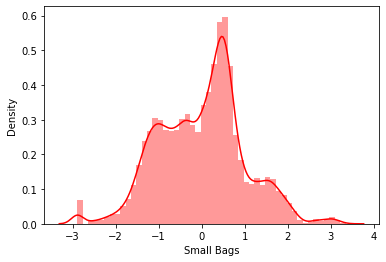

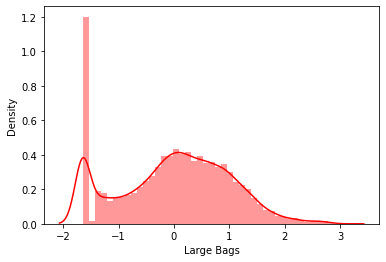

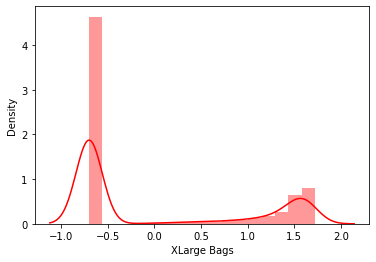

In [114]:
for i in skewed_col:
    plt.figure()
    sns.distplot(x1[i], color = 'r')

In [115]:
# We can see still data is not without skewness but not, these are in acceptable range

### Vetting of MultiColinearity 

##### Using VIF Technique

In [116]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [117]:
# function to calculate VIF
def cal_vif(data):   
    vif = pd.DataFrame()
    vif['Columns Name'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return (vif)

In [118]:
cal_vif(x1)

# Columns Name	VIF
# 0	Total Volume	71.987240
# 1	4046	17.295153
# 2	4225	17.995049
# 3	4770	7.083275
# 4	Total Bags	42.286483
# 5	Small Bags	23.864795
# 6	Large Bags	5.132367
# 7	XLarge Bags	2.656483

Columns Name        VIF
0                 Total Volume  71.987240
1                         4046  17.295153
2                         4225  17.995049
3                         4770   7.083275
4                   Total Bags  42.286483
5                   Small Bags  23.864795
6                   Large Bags   5.132367
7                  XLarge Bags   2.656483
8            type_conventional        inf
9                 type_organic        inf
10                   Month_Apr        inf
11                   Month_Aug        inf
12                   Month_Dec        inf
13                   Month_Feb        inf
14                   Month_Jan        inf
15                   Month_Jul        inf
16                   Month_Jun        inf
17                   Month_Mar        inf
18                   Month_May        inf
19                   Month_Nov        inf
20                   Month_Oct        inf
21                   Month_Sep        inf
22       Observation Year_2015        inf
23       Observation Year_2016        inf
24       Observation Year_2017        inf
25       Observation Year_2018        inf
26               region_Albany        inf
27              region_Atlanta        inf
28  region_BaltimoreWashington        inf
29                region_Boise        inf
30               region_Boston        inf
31     region_BuffaloRochester        inf
32           region_California        inf
33            region_Charlotte        inf
34              region_Chicago        inf
35     region_CincinnatiDayton        inf
36             region_Columbus        inf
37        region_DallasFtWorth        inf
38               region_Denver        inf
39              region_Detroit        inf
40          region_GrandRapids        inf
41           region_GreatLakes        inf
42   region_HarrisburgScranton        inf
43  region_HartfordSpringfield        inf
44              region_Houston        inf
45         region_Indianapolis        inf
46         region_Jacksonville        inf
47             region_LasVegas        inf
48           region_LosAngeles        inf
49           region_Louisville        inf
50    region_MiamiFtLauderdale        inf
51             region_Midsouth        inf
52            region_Nashville        inf
53     region_NewOrleansMobile        inf
54              region_NewYork        inf
55            region_Northeast        inf
56   region_NorthernNewEngland        inf
57              region_Orlando        inf
58         region_Philadelphia        inf
59        region_PhoenixTucson        inf
60           region_Pittsburgh        inf
61               region_Plains        inf
62             region_Portland        inf
63    region_RaleighGreensboro        inf
64      region_RichmondNorfolk        inf
65              region_Roanoke        inf
66           region_Sacramento        inf
67             region_SanDiego        inf
68         region_SanFrancisco        inf
69              region_Seattle        inf
70        region_SouthCarolina        inf
71         region_SouthCentral        inf
72            region_Southeast        inf
73              region_Spokane        inf
74              region_StLouis        inf
75             region_Syracuse        inf
76                region_Tampa        inf
77              region_TotalUS        inf
78                 region_West        inf
79     region_WestTexNewMexico        inf

In [119]:
# Total Volumne is highly correlation with 4046, 4225, 4770 columns and also with Total bags and large bags
# Here, using VIF it is showing hightest value of VIF
# Therefore, this column should be removed from dataset

In [120]:
x1.drop(columns = ['Total Volume'], inplace = True)

In [121]:
cal_vif(x1)

Columns Name        VIF
0                         4046  13.881042
1                         4225  13.139436
2                         4770   7.081995
3                   Total Bags  31.060563
4                   Small Bags  23.764523
5                   Large Bags   5.127305
6                  XLarge Bags   2.603191
7            type_conventional        inf
8                 type_organic        inf
9                    Month_Apr        inf
10                   Month_Aug        inf
11                   Month_Dec        inf
12                   Month_Feb        inf
13                   Month_Jan        inf
14                   Month_Jul        inf
15                   Month_Jun        inf
16                   Month_Mar        inf
17                   Month_May        inf
18                   Month_Nov        inf
19                   Month_Oct        inf
20                   Month_Sep        inf
21       Observation Year_2015        inf
22       Observation Year_2016        inf
23       Observation Year_2017        inf
24       Observation Year_2018        inf
25               region_Albany        inf
26              region_Atlanta        inf
27  region_BaltimoreWashington        inf
28                region_Boise        inf
29               region_Boston        inf
30     region_BuffaloRochester        inf
31           region_California        inf
32            region_Charlotte        inf
33              region_Chicago        inf
34     region_CincinnatiDayton        inf
35             region_Columbus        inf
36        region_DallasFtWorth        inf
37               region_Denver        inf
38              region_Detroit        inf
39          region_GrandRapids        inf
40           region_GreatLakes        inf
41   region_HarrisburgScranton        inf
42  region_HartfordSpringfield        inf
43              region_Houston        inf
44         region_Indianapolis        inf
45         region_Jacksonville        inf
46             region_LasVegas        inf
47           region_LosAngeles        inf
48           region_Louisville        inf
49    region_MiamiFtLauderdale        inf
50             region_Midsouth        inf
51            region_Nashville        inf
52     region_NewOrleansMobile        inf
53              region_NewYork        inf
54            region_Northeast        inf
55   region_NorthernNewEngland        inf
56              region_Orlando        inf
57         region_Philadelphia        inf
58        region_PhoenixTucson        inf
59           region_Pittsburgh        inf
60               region_Plains        inf
61             region_Portland        inf
62    region_RaleighGreensboro        inf
63      region_RichmondNorfolk        inf
64              region_Roanoke        inf
65           region_Sacramento        inf
66             region_SanDiego        inf
67         region_SanFrancisco        inf
68              region_Seattle        inf
69        region_SouthCarolina        inf
70         region_SouthCentral        inf
71            region_Southeast        inf
72              region_Spokane        inf
73              region_StLouis        inf
74             region_Syracuse        inf
75                region_Tampa        inf
76              region_TotalUS        inf
77                 region_West        inf
78     region_WestTexNewMexico        inf

In [122]:
# As reference taken from heatmap of Correlation, found Total bags and small bags are also highly correlation with each other
# but Total bags is contributing (-0.18) where as Small bag column is contributing (-0.17) for predicting Average Price
# As total bags having less contributing value we should delete it from dataset



In [123]:
x1.drop(columns = ['Total Bags'], inplace = True)

In [124]:
cal_vif(x1)

# Columns Name	VIF
# 0	4046	13.880107
# 1	4225	13.111971
# 2	4770	7.061766
# 3	Small Bags	10.375964
# 4	Large Bags	3.644026
# 5	XLarge Bags	2.583971

Columns Name        VIF
0                         4046  13.880107
1                         4225  13.111971
2                         4770   7.061766
3                   Small Bags  10.375964
4                   Large Bags   3.644026
5                  XLarge Bags   2.583971
6            type_conventional        inf
7                 type_organic        inf
8                    Month_Apr        inf
9                    Month_Aug        inf
10                   Month_Dec        inf
11                   Month_Feb        inf
12                   Month_Jan        inf
13                   Month_Jul        inf
14                   Month_Jun        inf
15                   Month_Mar        inf
16                   Month_May        inf
17                   Month_Nov        inf
18                   Month_Oct        inf
19                   Month_Sep        inf
20       Observation Year_2015        inf
21       Observation Year_2016        inf
22       Observation Year_2017        inf
23       Observation Year_2018        inf
24               region_Albany        inf
25              region_Atlanta        inf
26  region_BaltimoreWashington        inf
27                region_Boise        inf
28               region_Boston        inf
29     region_BuffaloRochester        inf
30           region_California        inf
31            region_Charlotte        inf
32              region_Chicago        inf
33     region_CincinnatiDayton        inf
34             region_Columbus        inf
35        region_DallasFtWorth        inf
36               region_Denver        inf
37              region_Detroit        inf
38          region_GrandRapids        inf
39           region_GreatLakes        inf
40   region_HarrisburgScranton        inf
41  region_HartfordSpringfield        inf
42              region_Houston        inf
43         region_Indianapolis        inf
44         region_Jacksonville        inf
45             region_LasVegas        inf
46           region_LosAngeles        inf
47           region_Louisville        inf
48    region_MiamiFtLauderdale        inf
49             region_Midsouth        inf
50            region_Nashville        inf
51     region_NewOrleansMobile        inf
52              region_NewYork        inf
53            region_Northeast        inf
54   region_NorthernNewEngland        inf
55              region_Orlando        inf
56         region_Philadelphia        inf
57        region_PhoenixTucson        inf
58           region_Pittsburgh        inf
59               region_Plains        inf
60             region_Portland        inf
61    region_RaleighGreensboro        inf
62      region_RichmondNorfolk        inf
63              region_Roanoke        inf
64           region_Sacramento        inf
65             region_SanDiego        inf
66         region_SanFrancisco        inf
67              region_Seattle        inf
68        region_SouthCarolina        inf
69         region_SouthCentral        inf
70            region_Southeast        inf
71              region_Spokane        inf
72              region_StLouis        inf
73             region_Syracuse        inf
74                region_Tampa        inf
75              region_TotalUS        inf
76                 region_West        inf
77     region_WestTexNewMexico        inf

In [125]:
# As we have already having few columns, we cannot delete many columns from dataset as that will lead high loss of data
# Therefore, it would be better to perform proceeding on these same data x1

# Now, almost every float type column is showing vif value which is in acceptable range for model building

In [126]:
# plt.figure(figsize = (8, 5))
# sns.heatmap(x1.corr(), annot = True, cmap = 'Blues', linewidth = 0.5, linecolor = 'blue' )   # Heatmap with number, 

# We can take reference from df heatmap of correlation

### Standiard Scaling 

In [127]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [128]:
x1.head()

4046      4225      4770  Small Bags  Large Bags  XLarge Bags  \
0 -0.658619  0.307313 -0.247250   -0.340627   -0.773351    -0.699849   
1 -0.776870  0.231647 -0.201041   -0.306425   -0.763435    -0.699849   
2 -0.731947  0.579503 -0.007072   -0.366303   -0.750820    -0.699849   
3 -0.634200  0.415100 -0.148322   -0.496853   -0.691865    -0.699849   
4 -0.685293  0.224806 -0.137918   -0.477201   -0.600975    -0.699849   

   type_conventional  type_organic  Month_Apr  Month_Aug  Month_Dec  \
0                  1             0          0          0          1   
1                  1             0          0          0          1   
2                  1             0          0          0          1   
3                  1             0          0          0          1   
4                  1             0          0          0          0   

   Month_Feb  Month_Jan  Month_Jul  Month_Jun  Month_Mar  Month_May  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   Month_Nov  Month_Oct  Month_Sep  Observation Year_2015  \
0          0          0          0                      1   
1          0          0          0                      1   
2          0          0          0                      1   
3          0          0          0                      1   
4          1          0          0                      1   

   Observation Year_2016  Observation Year_2017  Observation Year_2018  \
0                      0                      0                      0   
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   

   region_Albany  region_Atlanta  region_BaltimoreWashington  region_Boise  \
0              1               0                           0             0   
1              1               0                           0             0   
2              1               0                           0             0   
3              1               0                           0             0   
4              1               0                           0             0   

   region_Boston  region_BuffaloRochester  region_California  \
0              0                        0                  0   
1              0                        0                  0   
2              0                        0                  0   
3              0                        0                  0   
4              0                        0                  0   

   region_Charlotte  region_Chicago  region_CincinnatiDayton  region_Columbus  \
0                 0               0                        0                0   
1                 0               0                        0                0   
2                 0               0                        0                0   
3                 0               0                        0                0   
4                 0               0                        0                0   

   region_DallasFtWorth  region_Denver  region_Detroit  region_GrandRapids  \
0                     0              0               0                   0   
1                     0              0               0                   0   
2                     0              0               0                   0   
3                     0              0               0                   0   
4                     0              0               0                   0   

   region_GreatLakes  region_HarrisburgScranton  region_HartfordSpringfield  \
0                  

In [129]:
stand_col = ['4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags']

In [130]:
x1[stand_col] = ss.fit_transform(x1[stand_col])

In [131]:
print('shape of x1: ', x1.shape)
print('shape of y1: ', y1.shape)

shape of x1:  (18249, 78)
shape of y1:  (18249,)


## Machine learning for Average Price Prediction

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [133]:
def best_randomstate (model, x, y):
    best_fit = []
    for i in range(0, 200 ) :
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
        m = model()
        m.fit(x_train, y_train)
        m_predict_train = m.predict(x_train)
        m_predict_test = m.predict(x_test)

        training = r2_score(m_predict_train, y_train)
        testing = r2_score(m_predict_test, y_test)

    #     print('At random state', i, 'the training accuracy is :-', training2)
    #     print('At random state', i, 'the testing accuracy is :-', testing2) 
    #     print('\n')

        if np.abs(round(training, 2) - round(testing, 2)) < 0.01:
            best_fit.append(i)
    return (best_fit)

In [134]:
def check_model (model, x, y, r_list):
    for i in r_list :
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
        m = model()
        m.fit(x_train, y_train)
        m_predict_train = m.predict(x_train)
        m_predict_test = m.predict(x_test)

        training = r2_score(m_predict_train, y_train)
        testing = r2_score(m_predict_test, y_test)

        print('At random state', i, 'the training accuracy is :', training)
        print('At random state', i, 'the testing accuracy is :', testing) 
        print('_________________________________________________________________')

In [135]:
def train(algo, x, y, best_fit):
    # train the model
    model = algo()
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = best_fit)
    model.fit(x_train, y_train)
    
    # predict the training set
    m_predict_train = model.predict(x_train)
    m_predict_test = model.predict(x_test)
    
    training = r2_score(m_predict_train, y_train)
    testing = r2_score(m_predict_test, y_test)

    print('Training r2_score is :', training)
    print('Testing r2_score is :', testing) 
    
    print('__________________________________________________________________')
    print('Mean Squared Error: ', mean_squared_error(m_predict_test, y_test) )
    print('Mean Absolute error: ', mean_absolute_error(m_predict_test, y_test) )
    print('___________________________________________________________________')
#     print('Cross value score')
    
# #     # perform cross-validation
# #     for i in range(3, 12):
# #         cv_score = cross_val_score(model, x, y, cv = i ).mean()
# #         print('cv score',  cv_score ,'at', i, 'cross fold')

    plt.figure(figsize = (10, 5))
    plt.scatter(x = y_test, y = m_predict_test, color = 'r')
    plt.plot(y_test, y_test, color = 'g')
    plt.xlabel('Actual', fontsize= 18 )
    plt.ylabel('Predicted', fontsize = 18)
    plt.title(str(algo), fontsize = 20)


### Model 1: LinearRegression

In [136]:
# from sklearn.ensemble import AdaBoostRegressor
# from sklearn.ensemble import GradientBoostingRegressor
# import xgboost

In [154]:
best_fit1 = best_randomstate(LinearRegression, x1, y1)
print(best_fit1)

[1, 2, 7, 11, 19, 20, 26, 41, 53, 56, 59, 60, 62, 64, 65, 68, 71, 77, 86, 87, 91, 95, 96, 118, 121, 127, 131, 136, 137, 141, 145, 150, 159, 164, 165, 168, 173, 174, 176, 180, 185, 194, 198]


In [156]:
check_model(LinearRegression, x1, y1, best_fit1)

At random state 1 the training accuracy is : 0.5414769967773979
At random state 1 the testing accuracy is : 0.5410078494389754
_________________________________________________________________
At random state 2 the training accuracy is : 0.5402420701009196
At random state 2 the testing accuracy is : 0.5377400446844762
_________________________________________________________________
At random state 7 the training accuracy is : 0.537922116653385
At random state 7 the testing accuracy is : 0.54291280453776
_________________________________________________________________
At random state 11 the training accuracy is : 0.541736713267859
At random state 11 the testing accuracy is : 0.5391704795432355
_________________________________________________________________
At random state 19 the training accuracy is : 0.5441804470658453
At random state 19 the testing accuracy is : 0.539051611116093
_________________________________________________________________
At random state 20 the training accu

At random state 198 the training accuracy is : 0.5347288008489297
At random state 198 the testing accuracy is : 0.5330082679134553
_________________________________________________________________


Training r2_score is : 0.5409778280365871
Testing r2_score is : 0.5405562663212229
__________________________________________________________________
Mean Squared Error:  0.05103462385548708
Mean Absolute error:  0.16981103510051013
___________________________________________________________________


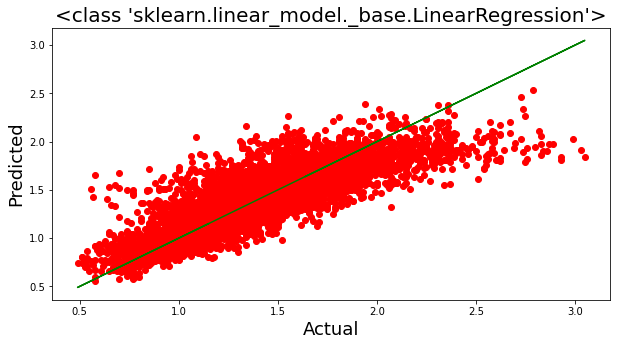

In [137]:
train (LinearRegression, x1, y1, 91)

In [162]:
# Accuracy of Training and test is almost same, here model is not over fitted or under fitted

#### Cross_val_score for LinearRegression

In [170]:
for val in range (3, 13):
    cv = cross_val_score(LinearRegression(), x1, y1, cv = val).mean()
    print('cv score is', cv, 'at cross fold value', val)

cv score is 0.41038842806505665 at cross fold value 3
cv score is 0.32795131683923906 at cross fold value 4
cv score is 0.3954591606387507 at cross fold value 5
cv score is 0.32083756937056007 at cross fold value 6
cv score is 0.3609014318478234 at cross fold value 7
cv score is 0.33410309196976173 at cross fold value 8
cv score is 0.3754024002769191 at cross fold value 9
cv score is 0.35659000918893924 at cross fold value 10
cv score is 0.3748674988581627 at cross fold value 11
cv score is 0.35470698396375194 at cross fold value 12


In [163]:
# Giving maximum value of cv (0.41038842806505665) at cross fold 3 

### Model 2: DecisionTreeRegressor

In [164]:
best_fit2 = best_randomstate(DecisionTreeRegressor, x1, y1)
print(best_fit2)

[]


In [165]:
max_acc2 = 0
random_s2 = 0

for i in range(100):
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = i)
    model2 = DecisionTreeRegressor()
    model2.fit(x_train, y_train)
    model2_predict = model2.predict(x_test)
    acc = r2_score(model2_predict, y_test)
    
    if acc > max_acc2:
        max_acc2 = acc
        random_s2 = i
print('Model is giving best accurancy', max_acc2, 'on random state of', random_s2 )

Model is giving best accurancy 0.7813055497324137 on random state of 26


Training r2_score is : 1.0
Testing r2_score is : 0.7830447664480089
__________________________________________________________________
Mean Squared Error:  0.03507004566210046
Mean Absolute error:  0.12435616438356165
___________________________________________________________________


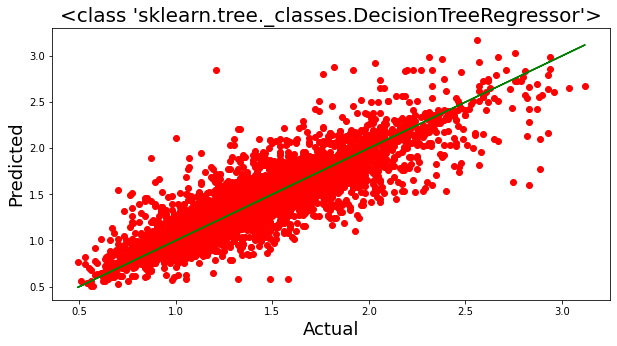

In [138]:
train(DecisionTreeRegressor, x1, y1, 26)  

In [234]:
# As this model is giving overfitted model
# Training accuracy is greater than testing accuracy

###### CV score for DecisionTreeRegressor

In [169]:
for val in range (15, 25):
    cv = cross_val_score(DecisionTreeRegressor(), x1, y1, cv = val).mean()
    print('cv score is', cv, 'at cross fold value', val)

cv score is 0.05410647264506885 at cross fold value 15
cv score is 0.038092037022592506 at cross fold value 16
cv score is 0.01994006007293047 at cross fold value 17
cv score is -0.017230542692652895 at cross fold value 18
cv score is 0.032545156149630626 at cross fold value 19
cv score is -0.04546718017368679 at cross fold value 20
cv score is -0.03399776196877874 at cross fold value 21
cv score is -0.08248612990017733 at cross fold value 22
cv score is -0.0203791672371514 at cross fold value 23
cv score is -0.09322801523485448 at cross fold value 24


In [171]:
# Highest CV value is at cross fold 15
# Accuracy of training is greater then accuracy of testing, giving over fitted model

### Model 3: KNeighborsRegressor

In [140]:
from sklearn.neighbors import KNeighborsRegressor

In [174]:
best_fit3 = best_randomstate(KNeighborsRegressor, x1, y1)
print(best_fit3)

In [281]:
max_acc = 0
random_s = 0

for i in range(100):
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = i)
    model = KNeighborsRegressor()
    model.fit(x_train, y_train)
    model_predict = model.predict(x_test)
    acc = r2_score(model_predict, y_test)
    
    if acc > max_acc:
        max_acc = acc
        random_s = i
print('Model is giving best accurancy', max_acc, 'on random state of', random_s )

Model is giving best accurancy 0.8503477183175429 on random state of 77


Training r2_score is : 0.8931168204047684
Testing r2_score is : 0.8503477183175429
__________________________________________________________________
Mean Squared Error:  0.02057277296803653
Mean Absolute error:  0.10286136986301368
___________________________________________________________________


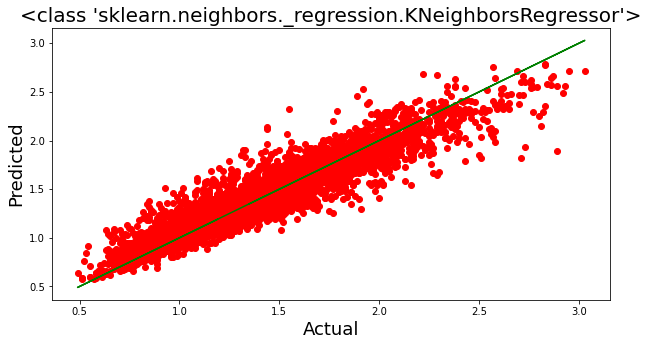

In [141]:
train(KNeighborsRegressor, x1, y1, 77)  

##### Cross val Score for KNeighborsRegressor

In [176]:
for val in range (5, 15):
    cv = cross_val_score(KNeighborsRegressor(), x1, y1, cv = val).mean()
    print('cv score is', cv, 'at cross fold value', val)

cv score is 0.062353588974978336 at cross fold value 5
cv score is 0.014001362756189387 at cross fold value 6
cv score is 0.12253662618833654 at cross fold value 7
cv score is 0.12215027738133936 at cross fold value 8
cv score is 0.17029850289973553 at cross fold value 9
cv score is 0.18103367697484463 at cross fold value 10
cv score is 0.18379983867338578 at cross fold value 11
cv score is 0.1715251777196787 at cross fold value 12
cv score is 0.2053258319123207 at cross fold value 13
cv score is 0.1946355710435636 at cross fold value 14


In [177]:
# Giving Highest CV Score (0.205325) at cross fold 13
# As we can see, there is difference between accuracy of testing data and training data, but that much difference can be 
# managed using hyper parameter tuning

### Model 4: RandomForestRegressor

In [142]:
from sklearn.ensemble import RandomForestRegressor

In [179]:
# not looking for random state, where it is giving best accuracy because it is taking lot of time
# therefore, we are taking randomly a ramdom state as 91

Training r2_score is : 0.9825801642920543
Testing r2_score is : 0.8518631754479156
__________________________________________________________________
Mean Squared Error:  0.019357581221917813
Mean Absolute error:  0.09705170776255706
___________________________________________________________________


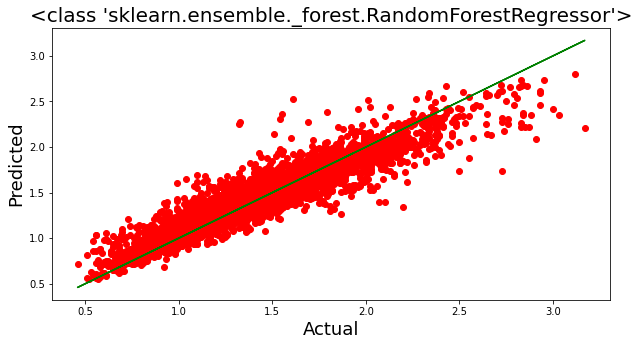

In [143]:
train(RandomForestRegressor, x1, y1, 101)  

##### Cross val Score for RandomForestRegressor

In [181]:
for val in range (5, 15):
    cv = cross_val_score(RandomForestRegressor(), x1, y1,  cv = val).mean()
    print('cv score is', cv, 'at cross fold value', val)

cv score is 0.3087019001014949 at cross fold value 5
cv score is 0.2611659814460116 at cross fold value 6
cv score is 0.3487586993359794 at cross fold value 7
cv score is 0.39791968611964024 at cross fold value 8
cv score is 0.4631248898063499 at cross fold value 9
cv score is 0.44188273097095043 at cross fold value 10
cv score is 0.48846458895396955 at cross fold value 11
cv score is 0.4695424772298263 at cross fold value 12
cv score is 0.502163125623909 at cross fold value 13
cv score is 0.490960561671187 at cross fold value 14


In [147]:
# LinearRegression is showing leat difference between CV and Accuracy but we also have to work for higher accuracy
# and linearRegression is giving only 0.54 % accuracy only and hence we can not select this model

# and Decision Tree is giving overfitted model
# Now, KneighborsRegression and RandomForestRegression both are giving 0.85 accuracy but we will consider, which is showing less
# Difference between cv score and accuracy

# As we can see, there is some difference between training and testing data accuracy in RandomforestRegressor
# We can reduce this by applying hyper parameter tuning

# here we find RandomForestRegressor is giving less difference between cv and accuracy, and its is showing least MSE 0.019
# But it have trainig accuracy is greater than testing accuracy , means it is giving overfitted model


### Final Model

##### Ensemble Techniques for LinearRegression

In [144]:
from sklearn.model_selection import GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = 91 )

# As by above experiment, LinearRegression is giving highest cross val score value at cross fold 3

In [145]:
parameter = {'fit_intercept' : [True, False], 
             'normalize' : [True, False],
             'positive' : [True, False],
             'n_jobs' : [1, None]} 

In [146]:
gcv = GridSearchCV(estimator = LinearRegression(), param_grid = parameter, cv = 3)

In [151]:
gcv.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False], 'n_jobs': [1, None],
                         'normalize': [True, False],
                         'positive': [True, False]})

In [152]:
gcv.best_params_

{'fit_intercept': True, 'n_jobs': 1, 'normalize': False, 'positive': False}

In [147]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = 129)

final_model = LinearRegression(fit_intercept = True, n_jobs = 1, normalize = False, positive = False)
final_model.fit(x_train, y_train)
final_pred = final_model.predict(x_test)
final_pred_train = final_model.predict(x_train)

final_train_accuracy = r2_score(final_pred_train, y_train)
final_test_accuracy = r2_score(final_pred, y_test)
print('Training accuracy: ', final_train_accuracy)
print('Testing accuracy: ', final_test_accuracy)
print('______________________________________________')
print('Mean squared error: ', mean_squared_error(final_pred, y_test) )
print('Mean absolute error: ', mean_absolute_error(final_pred, y_test) )

Training accuracy:  0.5331928758645481
Testing accuracy:  0.543862732309764
______________________________________________
Mean squared error:  0.05086181712665433
Mean absolute error:  0.16760842987478597


In [148]:
cross_val_score(final_model, x1, y1, cv = 3).mean()

0.41038842806505665

<AxesSubplot:title={'center':'Model Coefficients'}>

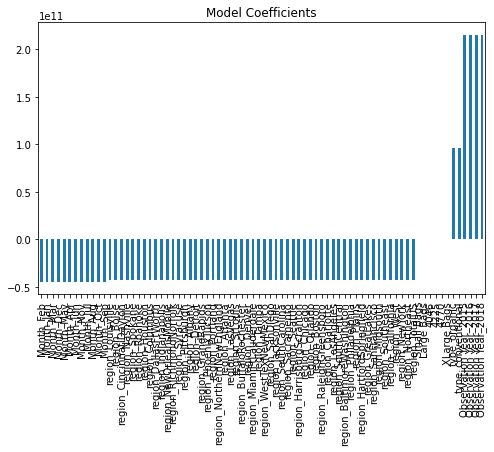

In [149]:
plt.figure(figsize = (8, 5))
coef = pd.Series(final_model.coef_, x1.columns).sort_values()
coef.plot(kind = 'bar', title = 'Model Coefficients')

### Graph

Text(0.5, 1.0, 'LinearRegression Machine Learning Model')

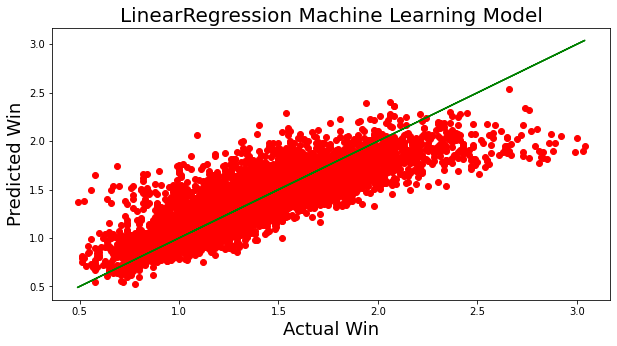

In [150]:
plt.figure(figsize = (10, 5))
plt.scatter(x = y_test, y = final_pred, color = 'r')
plt.plot(y_test, y_test, color = 'g')
plt.xlabel('Actual Win', fontsize= 18 )
plt.ylabel('Predicted Win', fontsize = 18)
plt.title('LinearRegression Machine Learning Model', fontsize = 20)

### Deploy model

In [151]:
import pickle
filename = 'avacado_price_predict.pkl'
pickle.dump(final_model, open(filename, 'wb'))

### Load model

In [153]:
load_model =  pickle.load(open('avacado_price_predict.pkl', 'rb'))
result = load_model.score(x_test, y_test)
print(result)

# 0.6888968984013286

0.6888968984013286


### Conclusion

In [154]:
predicted_price = np.array(load_model.predict(x_test))
original_price = np.array(y_test)

In [155]:
print(predicted_price.shape)
print(original_price.shape)
print(x_test.shape)
print(y_test.shape)

(5475,)
(5475,)
(5475, 78)
(5475,)


##### Creating dataframe for comparison of predicted and actual wins

In [156]:
df_compare = pd.DataFrame({'Original price': original_price, 'Predicted price': predicted_price}, index = range(len(original_price)))

In [157]:
df_compare

Original price  Predicted price
0               1.74         1.691315
1               1.19         0.979095
2               0.95         0.976654
3               1.28         1.633453
4               0.92         1.024689
5               1.69         1.815369
6               1.48         1.527374
7               2.55         1.791260
8               2.65         1.873718
9               0.93         0.907562
10              1.38         1.547913
11              1.61         1.586975
12              1.19         1.200745
13              1.80         1.913177
14              1.39         1.430267
15              1.47         1.598724
16              1.45         1.523499
17              1.69         1.502991
18              0.79         0.694305
19              2.73         1.842896
20              1.78         1.667999
21              1.26         1.366760
22              1.35         1.373840
23              0.97         1.013641
24              1.69         1.536835
25              1.51         1.186005
26              1.38         1.447144
27              1.45         1.333527
28              0.83         0.755951
29              0.96         1.108612
30              1.42         1.645599
31              1.29         1.553741
32              1.59         1.486603
33              1.66         1.839294
34              2.07         1.861725
35              0.81         0.970612
36              1.66         1.410736
37              1.55         1.405365
38              1.27         0.878998
39              1.85         1.734833
40              0.97         0.789825
41              2.03         1.868073
42              1.49         1.261505
43              1.38         1.412567
44              0.75         0.899414
45              1.34         1.174011
46              0.97         1.183472
47              1.15         1.125641
48              1.14         1.270813
49              2.25         1.980927
50              1.17         1.186432
51              1.65         1.387909
52              1.73         1.716827
53              0.77         0.887115
54              0.71         0.874725
55              1.51         1.788971
56              1.08         1.244720
57              0.89         0.971466
58              1.56         1.472900
59              1.60         1.529205
60              0.84         1.512238
61              1.39         1.390839
62              1.45         1.471191
63              1.93         2.034546
64              1.55         1.739349
65              1.47         1.513489
66              1.41         1.553833
67              0.94         1.054626
68              1.02         1.004883
69              1.53         1.624847
70              1.06         0.998230
71              1.42         1.209320
72              1.56         1.982391
73              0.91         1.057220
74              1.77         1.750397
75              1.00         1.756866
76              1.04         1.099976
77              1.33         1.434845
78              1.16         1.292816
79              2.81         1.773163
80              1.63         1.446930
81              1.92         2.123535
82              0.90         0.957275
83              1.21         0.957977
84              1.00         0.800232
85              1.14         1.028381
86              0.78         0.880859
87              1.48         1.665222
88              1.32         1.511200
89              0.63         1.036652
90              1.22         1.270477
91              1.45         1.241547
92              1.36         1.346741
93              0.97         1.084595
94              1.33         1.286194
95              0.84         0.888641
96              1.08         1.257721
97              1.61         1.612335
98              0.98         1.039581
99              0.84         1.048370
100             1.36         1.766510
101             1.03         1.096039
102             1.22         1.746552
103             0.89         1.079193
104             

## Consider region column as target variable

#### Now, this is a classification problem now

In [158]:
df.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags          type  region Month  \
0     8603.62       93.25          0.0  conventional  Albany   Dec   
1     9408.07       97.49          0.0  conventional  Albany   Dec   
2     8042.21      103.14          0.0  conventional  Albany   Dec   
3     5677.40      133.76          0.0  conventional  Albany   Dec   
4     5986.26      197.69          0.0  conventional  Albany   Nov   

  Observation Year  
0             2015  
1             2015  
2             2015  
3             2015  
4             2015

In [159]:
df2 = df.copy()

### Encoder

In [160]:
# Apply Labal encoder at target variable and for other categorical columns we have to apply OneHotEncoder

In [161]:
cat_col

# Index(['type', 'region', 'Month', 'Observation Year'], dtype='object')

Index(['type', 'region', 'Month', 'Observation Year'], dtype='object')

##### LabelEncoder

In [162]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [163]:
df2['region'] = le.fit_transform(df2['region'])  # labelencoding to target variable

##### OneHotEncoder

In [164]:
df2 = pd.get_dummies(df2, columns = ['type', 'Month', 'Observation Year']) 

In [165]:
df2.shape

# (18249, 28)

(18249, 28)

In [166]:
df2.head(2)

AveragePrice  Total Volume     4046      4225   4770  Total Bags  \
0          1.33      64236.62  1036.74  54454.85  48.16     8696.87   
1          1.35      54876.98   674.28  44638.81  58.33     9505.56   

   Small Bags  Large Bags  XLarge Bags  region  type_conventional  \
0     8603.62       93.25          0.0       0                  1   
1     9408.07       97.49          0.0       0                  1   

   type_organic  Month_Apr  Month_Aug  Month_Dec  Month_Feb  Month_Jan  \
0             0          0          0          1          0          0   
1             0          0          0          1          0          0   

   Month_Jul  Month_Jun  Month_Mar  Month_May  Month_Nov  Month_Oct  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   

   Month_Sep  Observation Year_2015  Observation Year_2016  \
0          0                      1                      0   
1          0                      1                      0   

   Observation Year_2017  Observation Year_2018  
0                      0                      0  
1                      0                      0

In [167]:
df2.dtypes

# AveragePrice             float64
# Total Volume             float64
# 4046                     float64
# 4225                     float64
# 4770                     float64
# Total Bags               float64
# Small Bags               float64
# Large Bags               float64
# XLarge Bags              float64
# region                     int32

# other columns are of   float64

AveragePrice             float64
Total Volume             float64
4046                     float64
4225                     float64
4770                     float64
Total Bags               float64
Small Bags               float64
Large Bags               float64
XLarge Bags              float64
region                     int32
type_conventional          uint8
type_organic               uint8
Month_Apr                  uint8
Month_Aug                  uint8
Month_Dec                  uint8
Month_Feb                  uint8
Month_Jan                  uint8
Month_Jul                  uint8
Month_Jun                  uint8
Month_Mar                  uint8
Month_May                  uint8
Month_Nov                  uint8
Month_Oct                  uint8
Month_Sep                  uint8
Observation Year_2015      uint8
Observation Year_2016      uint8
Observation Year_2017      uint8
Observation Year_2018      uint8
dtype: object

### Removing outliers

In [168]:

z = np.abs(zscore(df2))                  # Zscore operation
df2_z = df2[ (z < 3).all(axis = 1) ]

In [169]:
df2_z.shape

# (2842, 28)

(2842, 28)

In [170]:
(df.shape[0] - df2_z.shape[0]) / df2.shape[0] *100  

# 84.4265439202148

84.4265439202148

In [171]:
# this zscore method is giving high loss data, we can not use this method

In [172]:
# IQR Technique 

In [173]:
Q1 = df.quantile(0.25)    # 25 percentile
Q3 = df.quantile(0.75)    # 75 percentile
IQR = Q3 - Q1              # inter quartile 

In [174]:
df2_IQR = df2[ ~( (df2 < (Q1 - 1.5*IQR)) | (df2 > (Q3 + 1.5*IQR )) ).any(axis = 1) ]  # operation to remove outliers by IQR
df2_IQR.shape

# (11538, 28)

(11538, 28)

In [175]:
(df.shape[0] - df2_IQR.shape[0]) / df2.shape[0] *100  

# 36.774617787276014

36.774617787276014

In [176]:
# high percentage of data loss, we are getting using these methods
# as both methods are giving hig loss therefore, leaving data as it is

#### Visualisation 

In [177]:
df2['region'].value_counts()

# 53 (WestTexNewMexico columns) no. region()  that region have less obervation data as compare to other, 
# therefore data is imbalanced,
# Need to apply Balancing data technique

0     338
40    338
29    338
30    338
31    338
32    338
33    338
34    338
35    338
36    338
37    338
38    338
39    338
41    338
1     338
42    338
43    338
44    338
45    338
46    338
47    338
48    338
49    338
50    338
51    338
52    338
28    338
27    338
26    338
25    338
2     338
3     338
4     338
5     338
6     338
7     338
8     338
9     338
10    338
11    338
12    338
13    338
14    338
15    338
16    338
17    338
18    338
19    338
20    338
21    338
22    338
23    338
24    338
53    335
Name: region, dtype: int64

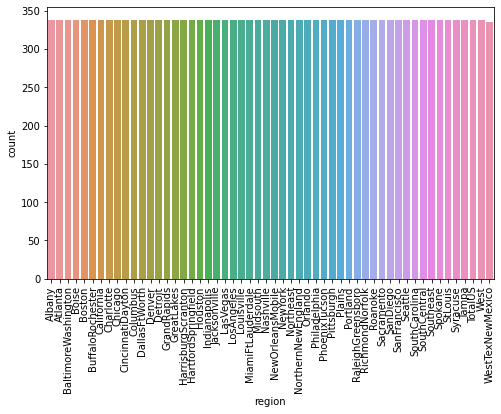

In [178]:
df['region'].unique()
plt.figure(figsize = (8, 5))
scat = sns.countplot(df['region'])
scat.set_xticklabels(labels = l, rotation = 90)
plt.show()

In [179]:
# We can easily analys by graph that, WestTextNewMexico column have less operavation , 
# Need to apply SMOTE technique to balance it

#### Checking impect of variables to the target variable

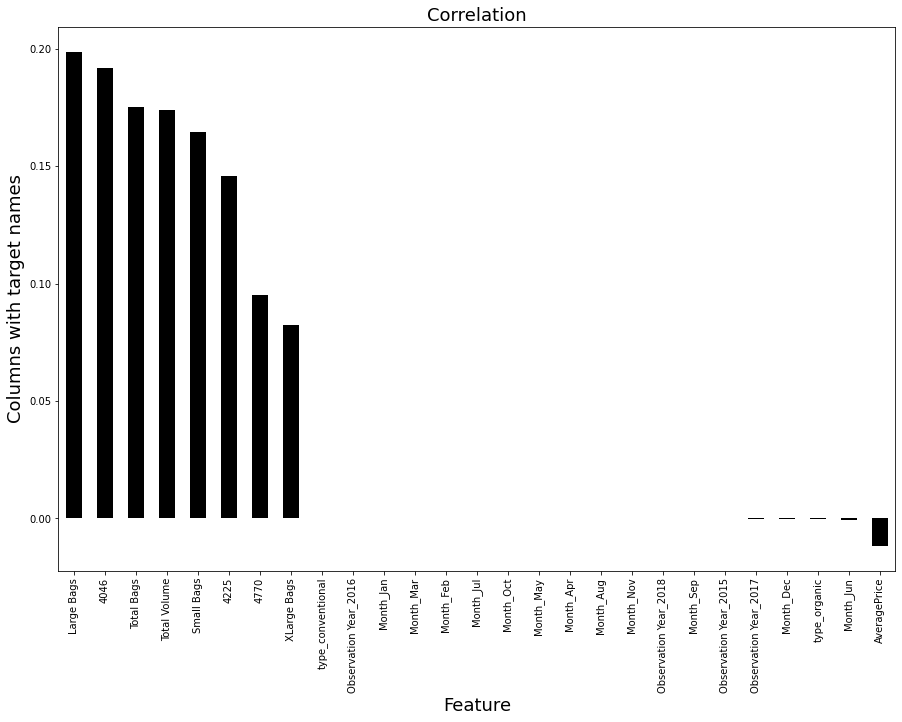

In [180]:
plt.figure(figsize = (15, 10))
df2.corr()['region'].sort_values(ascending = False).drop(['region']).plot(kind = 'bar', color = 'black')
plt.xlabel( 'Feature', fontsize = 18)
plt.ylabel( 'Columns with target names', fontsize = 18)
plt.title ('Correlation', fontsize = 18)
plt.show()

In [181]:
#  Avgrangeprice negatively impacting region 
# large Bags and 4046 columns are highly impecting target variable

### Seperating Data into x2 and y2

In [182]:
x2 = df2.drop(columns= ['region'])
y2 = df2['region']

print('shape of test', x2.shape)
print('shape of y', y2.shape)

# shape of test (18249, 27)
# shape of y (18249,)

shape of test (18249, 27)
shape of y (18249,)


In [183]:
x2.dtypes

# AveragePrice             float64
# Total Volume             float64
# 4046                     float64
# 4225                     float64
# 4770                     float64
# Total Bags               float64
# Small Bags               float64
# Large Bags               float64
# XLarge Bags              float64

AveragePrice             float64
Total Volume             float64
4046                     float64
4225                     float64
4770                     float64
Total Bags               float64
Small Bags               float64
Large Bags               float64
XLarge Bags              float64
type_conventional          uint8
type_organic               uint8
Month_Apr                  uint8
Month_Aug                  uint8
Month_Dec                  uint8
Month_Feb                  uint8
Month_Jan                  uint8
Month_Jul                  uint8
Month_Jun                  uint8
Month_Mar                  uint8
Month_May                  uint8
Month_Nov                  uint8
Month_Oct                  uint8
Month_Sep                  uint8
Observation Year_2015      uint8
Observation Year_2016      uint8
Observation Year_2017      uint8
Observation Year_2018      uint8
dtype: object

#### Removing Skewness

In [184]:
skewed_columns = x2.select_dtypes(include = 'float64').keys()
skewed_columns

# Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
#        'Small Bags', 'Large Bags', 'XLarge Bags'],
#       dtype='object')

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags'],
      dtype='object')

In [185]:
x2.skew()  

# AveragePrice              0.580052
# Total Volume              9.008435
# 4046                      8.648894
# 4225                      8.943214
# 4770                     10.160204
# Total Bags                9.756879
# Small Bags                9.541453
# Large Bags                9.797261
# XLarge Bags              13.140754

AveragePrice              0.580303
Total Volume              9.007687
4046                      8.648220
4225                      8.942466
4770                     10.159396
Total Bags                9.756072
Small Bags                9.540660
Large Bags                9.796455
XLarge Bags              13.139751
type_conventional        -0.000329
type_organic              0.000329
Month_Apr                 3.175353
Month_Aug                 3.175353
Month_Dec                 3.176802
Month_Feb                 2.768866
Month_Jan                 2.551008
Month_Jul                 3.026762
Month_Jun                 3.343791
Month_Mar                 2.655666
Month_May                 3.026762
Month_Nov                 3.175353
Month_Oct                 3.026762
Month_Sep                 3.340554
Observation Year_2015     0.833423
Observation Year_2016     0.833145
Observation Year_2017     0.803834
Observation Year_2018     3.340554
dtype: float64

In [186]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

In [187]:
x2[skewed_columns] = pt.fit_transform(x2[skewed_columns])

In [188]:
x2.skew()

# AveragePrice             0.005596
# Total Volume             0.011171
# 4046                    -0.022679
# 4225                    -0.017740
# 4770                     0.032184
# Total Bags              -0.001626
# Small Bags               0.007058
# Large Bags              -0.073809
# XLarge Bags              0.793520

AveragePrice             0.005596
Total Volume             0.011171
4046                    -0.022679
4225                    -0.017740
4770                     0.032184
Total Bags              -0.001626
Small Bags               0.007058
Large Bags              -0.073809
XLarge Bags              0.793520
type_conventional       -0.000329
type_organic             0.000329
Month_Apr                3.175353
Month_Aug                3.175353
Month_Dec                3.176802
Month_Feb                2.768866
Month_Jan                2.551008
Month_Jul                3.026762
Month_Jun                3.343791
Month_Mar                2.655666
Month_May                3.026762
Month_Nov                3.175353
Month_Oct                3.026762
Month_Sep                3.340554
Observation Year_2015    0.833423
Observation Year_2016    0.833145
Observation Year_2017    0.803834
Observation Year_2018    3.340554
dtype: float64

In [189]:
# Now, all columns are showing skewness, which is under acceptable range

####  SMOTE (To balance the data)

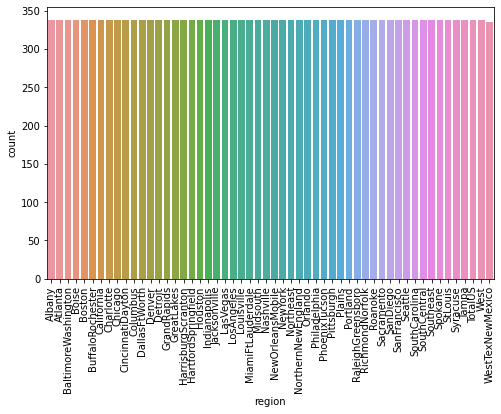

In [190]:
y2.unique()
plt.figure(figsize = (8, 5))
scat = sns.countplot(y2)
scat.set_xticklabels(labels = l, rotation = 90)
plt.show()

# sns.countplot(y2)

In [191]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()

In [192]:
x2, y2 = smt.fit_resample(x2, y2)

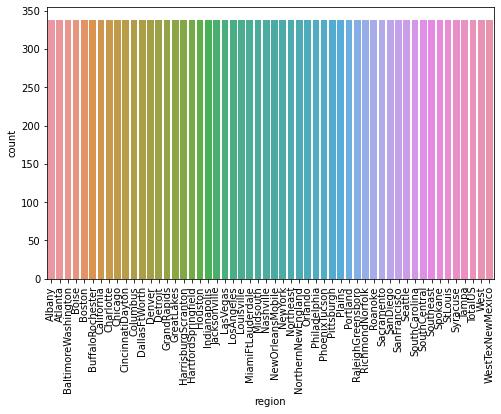

In [193]:
y2.unique()
plt.figure(figsize = (8, 5))
scat = sns.countplot(y2)
scat.set_xticklabels(labels = l, rotation = 90)
plt.show()

In [194]:
# We can observe change in WestTexNewMexico region count, it become equal as other
# Now, we can see, all region have equally balanced data 

#### Removing Multicolinearity

##### Using VIF(Variance Inflation Factor)

In [195]:
cal_vif(x2)

Columns Name         VIF
0            AveragePrice    2.610557
1            Total Volume   50.110380
2                    4046    6.896675
3                    4225   12.013501
4                    4770    4.298680
5              Total Bags   33.494383
6              Small Bags   16.229882
7              Large Bags    3.504315
8             XLarge Bags    2.234074
9       type_conventional         inf
10           type_organic         inf
11              Month_Apr  649.138010
12              Month_Aug  649.182517
13              Month_Dec  648.741188
14              Month_Feb  783.527288
15              Month_Jan  869.783099
16              Month_Jul  694.546103
17              Month_Jun  602.285529
18              Month_Mar  826.973730
19              Month_May  694.998955
20              Month_Nov  649.180674
21              Month_Oct  694.554724
22              Month_Sep  603.147182
23  Observation Year_2015         inf
24  Observation Year_2016         inf
25  Observation Year_2017         inf
26  Observation Year_2018         inf

In [196]:
# Total Volumne column is giving high vif value, mean it is highly correlated with other variables
# Need to remove this from dataset

In [197]:
x2.drop(columns = 'Total Volume', inplace = True)

In [198]:
cal_vif(x2)

# Columns Name	VIF
# 0	AveragePrice	2.540748
# 1	4046	3.918547
# 2	4225	4.923560
# 3	4770	4.287850
# 4	Total Bags	25.252104
# 5	Small Bags	16.222763
# 6	Large Bags	3.444475
# 7	XLarge Bags	2.217560

Columns Name         VIF
0            AveragePrice    2.541099
1                    4046    3.919032
2                    4225    4.923628
3                    4770    4.288374
4              Total Bags   25.251245
5              Small Bags   16.222204
6              Large Bags    3.444527
7             XLarge Bags    2.217999
8       type_conventional         inf
9            type_organic         inf
10              Month_Apr  649.114159
11              Month_Aug  649.156268
12              Month_Dec  648.726139
13              Month_Feb  783.508262
14              Month_Jan  869.763975
15              Month_Jul  694.515430
16              Month_Jun  602.257073
17              Month_Mar  826.947745
18              Month_May  694.967075
19              Month_Nov  649.160427
20              Month_Oct  694.526935
21              Month_Sep  603.120919
22  Observation Year_2015         inf
23  Observation Year_2016         inf
24  Observation Year_2017         inf
25  Observation Year_2018         inf

In [199]:
# As we have alredy observed in heatmap of correlation, that Total Bags is highly correlated with Small
# Bags and Large Bags, therefore need to remove this column

In [200]:
x2.drop(columns = 'Total Bags', inplace = True)

# Columns Name	VIF
# 0	AveragePrice	2.317714
# 1	4046	3.915205
# 2	4225	4.646658
# 3	4770	4.285697
# 4	Small Bags	4.307709
# 5	Large Bags	2.250573
# 6	XLarge Bags	2.215396

In [201]:
cal_vif(x2)

Columns Name         VIF
0            AveragePrice    2.317998
1                    4046    3.915686
2                    4225    4.646675
3                    4770    4.286228
4              Small Bags    4.307320
5              Large Bags    2.250583
6             XLarge Bags    2.215832
7       type_conventional         inf
8            type_organic         inf
9               Month_Apr  649.111904
10              Month_Aug  649.149006
11              Month_Dec  648.724791
12              Month_Feb  783.507633
13              Month_Jan  869.763921
14              Month_Jul  694.507127
15              Month_Jun  602.253151
16              Month_Mar  826.946320
17              Month_May  694.963448
18              Month_Nov  649.155424
19              Month_Oct  694.515994
20              Month_Sep  603.113537
21  Observation Year_2015         inf
22  Observation Year_2016         inf
23  Observation Year_2017         inf
24  Observation Year_2018         inf

In [202]:
# Now, all variables are showing vif value which is in acceptable range

In [203]:
x2.head()

AveragePrice      4046      4225      4770  Small Bags  Large Bags  \
0     -0.086248 -0.658619  0.307313 -0.247250   -0.340627   -0.773351   
1     -0.034022 -0.776870  0.231647 -0.201041   -0.306425   -0.763435   
2     -1.273938 -0.731947  0.579503 -0.007072   -0.366303   -0.750820   
3     -0.793421 -0.634200  0.415100 -0.148322   -0.496853   -0.691865   
4     -0.219440 -0.685293  0.224806 -0.137918   -0.477201   -0.600975   

   XLarge Bags  type_conventional  type_organic  Month_Apr  Month_Aug  \
0    -0.699849                  1             0          0          0   
1    -0.699849                  1             0          0          0   
2    -0.699849                  1             0          0          0   
3    -0.699849                  1             0          0          0   
4    -0.699849                  1             0          0          0   

   Month_Dec  Month_Feb  Month_Jan  Month_Jul  Month_Jun  Month_Mar  \
0          1          0          0          0          0          0   
1          1          0          0          0          0          0   
2          1          0          0          0          0          0   
3          1          0          0          0          0          0   
4          0          0          0          0          0          0   

   Month_May  Month_Nov  Month_Oct  Month_Sep  Observation Year_2015  \
0          0          0          0          0                      1   
1          0          0          0          0                      1   
2          0          0          0          0                      1   
3          0          0          0          0                      1   
4          0          1          0          0                      1   

   Observation Year_2016  Observation Year_2017  Observation Year_2018  
0                      0                      0                      0  
1                      0                      0                      0  
2                      0                      0                      0  
3                      0                      0                      0  
4                      0                      0                      0

#### Standard Scaling

In [204]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [205]:
scaling_col = ['AveragePrice', '4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags']

In [206]:
x2[scaling_col] = ss.fit_transform(x2[scaling_col])

In [207]:
x2.head()

AveragePrice      4046      4225      4770  Small Bags  Large Bags  \
0     -0.086184 -0.658710  0.307289 -0.247301   -0.340672   -0.773418   
1     -0.033966 -0.776959  0.231620 -0.201094   -0.306469   -0.763503   
2     -1.273684 -0.732037  0.579491 -0.007132   -0.366350   -0.750888   
3     -0.793244 -0.634292  0.415080 -0.148376   -0.496906   -0.691936   
4     -0.219355 -0.685384  0.224778 -0.137973   -0.477253   -0.601049   

   XLarge Bags  type_conventional  type_organic  Month_Apr  Month_Aug  \
0    -0.699934                  1             0          0          0   
1    -0.699934                  1             0          0          0   
2    -0.699934                  1             0          0          0   
3    -0.699934                  1             0          0          0   
4    -0.699934                  1             0          0          0   

   Month_Dec  Month_Feb  Month_Jan  Month_Jul  Month_Jun  Month_Mar  \
0          1          0          0          0          0          0   
1          1          0          0          0          0          0   
2          1          0          0          0          0          0   
3          1          0          0          0          0          0   
4          0          0          0          0          0          0   

   Month_May  Month_Nov  Month_Oct  Month_Sep  Observation Year_2015  \
0          0          0          0          0                      1   
1          0          0          0          0                      1   
2          0          0          0          0                      1   
3          0          0          0          0                      1   
4          0          1          0          0                      1   

   Observation Year_2016  Observation Year_2017  Observation Year_2018  
0                      0                      0                      0  
1                      0                      0                      0  
2                      0                      0                      0  
3                      0                      0                      0  
4                      0                      0                      0

### Machine Learning Model

In [209]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [210]:
print('Shape of x2', x2.shape)
print('Shape of y2', y2.shape)

# Shape of x2 (18252, 25)
# Shape of y2 (18252,)

Shape of x2 (18252, 25)
Shape of y2 (18252,)


In [211]:
def randomstate (model, x, y):
    best_fit = []
    for i in range(0, 100 ) :
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
        m = model()
        m.fit(x_train, y_train)
        m_predict_train = m.predict(x_train)
        m_predict_test = m.predict(x_test)

        training = accuracy_score(m_predict_train, y_train)
        testing = accuracy_score(m_predict_test, y_test)

    #     print('At random state', i, 'the training accuracy is :-', training2)
    #     print('At random state', i, 'the testing accuracy is :-', testing2) 
    #     print('\n')

        if np.abs(round(training, 2) - round(testing, 2)) < 0.01:
            best_fit.append(i)
    return (best_fit)

In [212]:
def checking (model, x, y, r_list):
    for i in r_list :
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
        m = model()
        m.fit(x_train, y_train)
        m_predict_train = m.predict(x_train)
        m_predict_test = m.predict(x_test)

        training = accuracy_score(m_predict_train, y_train)
        testing = accuracy_score(m_predict_test, y_test)

        print('At random state', i, 'the training accuracy is :-', training)
        print('At random state', i, 'the testing accuracy is :-', testing) 
        print('_________________________________________________________________')

In [216]:
def train(algo, x, y, best_fit):
    # train the model
    model = algo()
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = best_fit)
    model.fit(x_train, y_train)
    
    # predict the training set
    pred = model.predict(x_test)
    m_pred = model.predict(x_train)
    
    training = accuracy_score(m_pred, y_train)
    testing = accuracy_score(pred, y_test)

    print('Training accuracy is :', training)
    print('Testing accuracy is :', testing) 
    
    print('__________________________________________________________________')
    print('Classification Report: \n', classification_report(pred, y_test) )
    print('Confusion Matrix: \n', confusion_matrix(pred, y_test) )
    print('___________________________________________________________________')
#     print('Cross value score')
    
#     # perform cross-validation
#     for i in range(4, 12):
#         cv_score = cross_val_score(model, x, y, cv = i ).mean()
#         print('cv score',  cv_score ,'at', i, 'cross fold')


#### Model 1:  LogisticRegression

In [214]:
# random1 = randomstate(LogisticRegression, x2, y2)
# print(random1) 

# _________________taking so much time their , we will take randomly a value of random_state

In [225]:
max_acc = 0
random_s = 0

for i in range(21, 51):
    x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.30, random_state = i)
    model = LogisticRegression()
    model.fit(x_train, y_train)
    model_pred = model.predict(x_test)
    acc = accuracy_score(model_pred, y_test)
    
    if acc > max_acc:
        max_acc = acc
        random_s = i
print('Model is giving best accurancy', max_acc, 'on random state of', random_s )

Model is giving best accurancy 0.4972607742878013 on random state of 29


In [217]:
train(LogisticRegression, x2, y2, 29)

Training accuracy is : 0.5125234815278648
Testing accuracy is : 0.4965303140978817
__________________________________________________________________
Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.47      0.54       117
           1       0.42      0.20      0.27       200
           2       0.55      0.60      0.57        98
           3       0.41      0.55      0.47        74
           4       0.51      0.57      0.54        94
           5       0.33      0.54      0.41        67
           6       0.90      0.88      0.89       104
           7       0.59      0.63      0.61       111
           8       0.78      0.58      0.66       126
           9       0.79      0.53      0.64       148
          10       0.29      0.53      0.37        58
          11       0.63      0.50      0.56       128
          12       0.49      0.44      0.47       122
          13       0.17      0.20      0.18        87
          14  

##### Cross value for LogisticRegression

In [196]:
print('Cross value score')
# perform cross-validation
for i in range(2, 8):
    cv_score = cross_val_score(LogisticRegression(), x2, y2, cv = i ).mean()
    print('cv score',  cv_score ,'at', i, 'cross fold')

Cross value score
cv score 0.018847249616480384 at 2 cross fold
cv score 0.26917598071444226 at 3 cross fold
cv score 0.29985754985754987 at 4 cross fold
cv score 0.3534999230835613 at 5 cross fold
cv score 0.3397435897435898 at 6 cross fold
cv score 0.38286884448160363 at 7 cross fold


In [218]:
# LogisticRegression is giving highest value at cross fold 7

#### Model 2: DecisionTreeClassifier

In [220]:
max_acc = 0
random_s = 0

for i in range(21, 51):
    x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.30, random_state = i)
    model = DecisionTreeClassifier()
    model.fit(x_train, y_train)
    model_pred = model.predict(x_test)
    acc = accuracy_score(model_pred, y_test)
    
    if acc > max_acc:
        max_acc = acc
        random_s = i
print('Model is giving best accurancy', max_acc, 'on random state of', random_s )

Model is giving best accurancy 0.8013148283418554 on random state of 30


In [225]:
train(DecisionTreeClassifier, x2, y2, 30)

Training accuracy is : 1.0
Testing accuracy is : 0.7982103725346968
__________________________________________________________________
Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.88      0.79        97
           1       0.63      0.80      0.71        82
           2       0.89      0.87      0.88       112
           3       0.87      0.81      0.84       124
           4       0.81      0.80      0.81       109
           5       0.73      0.64      0.68        95
           6       0.88      0.94      0.91        84
           7       0.77      0.84      0.80        89
           8       0.93      0.88      0.90       117
           9       0.87      0.82      0.84       114
          10       0.74      0.75      0.74       106
          11       0.82      0.83      0.82       101
          12       0.86      0.91      0.88        97
          13       0.79      0.63      0.70       103
          14       0.80      

##### Cross value for DecisionTreeClassifier

In [201]:
print('Cross value score')
# perform cross-validation
for i in range(5, 12):
    cv_score = cross_val_score(DecisionTreeClassifier(), x2, y2, cv = i ).mean()
    print('cv score',  cv_score ,'at', i, 'cross fold')

Cross value score
cv score 0.5454152474645715 at 5 cross fold
cv score 0.5413105413105413 at 6 cross fold
cv score 0.6061183031459494 at 7 cross fold
cv score 0.618604500040536 at 8 cross fold
cv score 0.6128643436335744 at 9 cross fold
cv score 0.6330218607931102 at 10 cross fold
cv score 0.6478108059395233 at 11 cross fold


In [203]:
# As we can see, maximum cv value, we are getting at cross fold 11

#### Model 3: RandomForestClassifier

In [204]:
max_acc = 0
random_s = 0

for i in range(21, 51):
    x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.30, random_state = i)
    model = RandomForestClassifier()
    model.fit(x_train, y_train)
    model_pred = model.predict(x_test)
    acc = accuracy_score(model_pred, y_test)
    
    if acc > max_acc:
        max_acc = acc
        random_s = i
print('Model is giving best accurancy', max_acc, 'on random state of', random_s )

Model is giving best accurancy 0.9251278305332359 on random state of 33


In [226]:
train(RandomForestClassifier, x2, y2, 33)

Training accuracy is : 1.0
Testing accuracy is : 0.9254930606281958
__________________________________________________________________
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.85      0.90       117
           1       0.91      0.87      0.89       103
           2       1.00      0.96      0.98       113
           3       0.86      0.93      0.89        85
           4       0.97      0.97      0.97       103
           5       0.87      0.93      0.90       103
           6       0.99      0.98      0.98        95
           7       0.95      0.98      0.96        93
           8       1.00      0.98      0.99        94
           9       0.92      0.91      0.91        99
          10       0.93      0.82      0.87        98
          11       0.98      0.91      0.94       122
          12       0.97      0.99      0.98       105
          13       0.85      0.92      0.89       101
          14       0.92      

##### Cross value for randomforestClassifier

In [206]:
print('Cross value score')
# perform cross-validation
for i in range(5, 12):
    cv_score = cross_val_score(RandomForestClassifier(), x2, y2, cv = i ).mean()
    print('cv score',  cv_score ,'at', i, 'cross fold')

Cross value score
cv score 0.6726879706441846 at 5 cross fold
cv score 0.6821718167872014 at 6 cross fold
cv score 0.7527818777867313 at 7 cross fold
cv score 0.7607217637527708 at 8 cross fold
cv score 0.7593140477755863 at 9 cross fold
cv score 0.7617143543038906 at 10 cross fold
cv score 0.787352665635417 at 11 cross fold


In [227]:
# RandomeForestClassifer is giving highest value of cv at cross fold 11

#### Model 4: KNeighborsClassifier

In [228]:
from sklearn.neighbors import KNeighborsClassifier

In [209]:
max_acc = 0
random_s = 0

for i in range(21, 51):
    x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.30, random_state = i)
    model = KNeighborsClassifier()
    model.fit(x_train, y_train)
    model_pred = model.predict(x_test)
    acc = accuracy_score(model_pred, y_test)
    
    if acc > max_acc:
        max_acc = acc
        random_s = i
print('Model is giving best accurancy', max_acc, 'on random state of', random_s )

Model is giving best accurancy 0.4810080350620891 on random state of 34


In [229]:
train(KNeighborsClassifier, x2, y2, 34)

Training accuracy is : 0.7558703819661866
Testing accuracy is : 0.4806428049671293
__________________________________________________________________
Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.42      0.53       170
           1       0.58      0.34      0.43       161
           2       0.63      0.50      0.56       143
           3       0.57      0.58      0.58       121
           4       0.67      0.47      0.55       134
           5       0.52      0.39      0.44       132
           6       0.69      0.56      0.62       126
           7       0.58      0.44      0.50       135
           8       0.57      0.68      0.62        80
           9       0.57      0.37      0.45       147
          10       0.46      0.27      0.34       162
          11       0.67      0.49      0.56       144
          12       0.53      0.73      0.61        81
          13       0.28      0.32      0.30        82
          14  

In [211]:
print('Cross value score')
# perform cross-validation
for i in range(5, 12):
    cv_score = cross_val_score(KNeighborsClassifier(), x2, y2, cv = i ).mean()
    print('cv score',  cv_score ,'at', i, 'cross fold')

Cross value score
cv score 0.46301573972977933 at 5 cross fold
cv score 0.43069252684637305 at 6 cross fold
cv score 0.518621135471916 at 7 cross fold
cv score 0.5325348466027131 at 8 cross fold
cv score 0.5390642121411352 at 9 cross fold
cv score 0.5507729448303802 at 10 cross fold
cv score 0.5732860754211982 at 11 cross fold


In [231]:
# Model Observation 
#                                     Training Acc.        Testing Acc.         CV         Differnce (cv and Testing Acc.)
# 1. LogisticRegression                0.51                0.49              0.38           0.11
# 2. DecisionTreeClassifier            1                   0.80              0.64           0.15        
# 3. RandomForestClassifier            1                   0.92              0.78           0.13
# 4. KNeighborsClassifier              0.75                0.48              0.57           0.09

# LogisticRegression
# LogisticRegression is giving least difference betweeen CV and Testing Acc. but, we have think about one more thing that is 
# accuracy, it is giving very less accuracy. Hence we should not select this model as final model

# DecisionTreeClassifier
# As we can observe, very high difference we found between (Train Acc > Test Acc), hence, KneighborsClassifier is giving
# highly overfitted model

# KNeighborsClassifier
# (Train Acc > Test Acc), found very high difference, hence DecisionTreeClassifier also giving highly overfitted model

# RandomForestClassifier
# This model giving difference between train and test accuracy, but by applying parameter tunning or ensemble techniques
#we can reduce this gap And after logistic, RandomForest is showing least difference between CV and Testing accuracy
# Hence, RandomForestClassifier select as a  final model


# Note: we getting difference between cv and accuracy because, data have ouliers, 
# outliers are not removed due to high loss of data

#### Final Model (RandomForestClassifier)
##### Ensemble Techinques

In [227]:
parameter = {'criterion' : ['gini', 'entropy'], 'max_features' : ['auto', 'sqrt', 'log2'],
             'bootstrap' : [True, False], 'n_estimators': [10, 50, 100, 120 ]  }

In [252]:
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.30, random_state = 33)
# as we have observed our model; is giving best fit at random state of "33"
# This model was giving highest value of cv at cross fold 11

gcv = GridSearchCV(estimator = RandomForestClassifier(), param_grid = parameter, cv = 11)
gcv.fit(x_train, y_train)


# GridSearchCV(cv=5, estimator=RandomForestClassifier(),
#              param_grid={'bootstrap': [True, False],
#                          'criterion': ['gini', 'entropy'],
#                          'max_features': ['auto', 'sqrt', 'log2'],
#                          'n_estimators': [10, 50, 100, 120]})

GridSearchCV(cv=11, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100, 120]})

In [232]:
gcv.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_features': 'auto',
 'n_estimators': 120}

In [231]:
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.30, random_state = 33)
final_model = RandomForestClassifier(bootstrap = False, criterion = 'gini', max_features = 'auto', n_estimators = 120)
final_model.fit(x_train, y_train)
final_pred = final_model.predict(x_test)
final_pred_train = final_model.predict(x_train)
print('Accuracy_Score: ', accuracy_score(final_pred, y_test))
print('_________________________________________________________________________________')
print('Classification report: ', classification_report(final_pred, y_test))
print('confusion_matrix: ', confusion_matrix(final_pred, y_test))

Accuracy_Score:  0.9317019722425128
_________________________________________________________________________________
Classification report:                precision    recall  f1-score   support

           0       0.94      0.90      0.92       110
           1       0.91      0.88      0.90       102
           2       1.00      0.96      0.98       113
           3       0.88      0.90      0.89        90
           4       0.99      0.99      0.99       103
           5       0.88      0.91      0.89       107
           6       1.00      0.98      0.99        96
           7       0.96      0.97      0.96        95
           8       0.99      0.98      0.98        93
           9       0.92      0.90      0.91       100
          10       0.92      0.78      0.84       101
          11       0.97      0.92      0.95       119
          12       0.98      0.99      0.99       106
          13       0.84      0.93      0.88        99
          14       0.93      0.87      0.90    

##### Cross Value Score

In [240]:
# Our Model is giving highest CV value at CV 11, therefore, we are considering cv as 11
cv_score = cross_val_score(final_model, x2, y2, cv = 11 ).mean()
cv_score

# 0.7850513017052593

0.7850513017052593

#### AOC_ROC

In [233]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [278]:
final_pred_prob = final_model.predict_proba(x_test)
len(final_pred_prob)

# 5476

5476

In [251]:
roc_auc_score(y_test, final_pred_prob, multi_class = 'ovr'  )

# 0.9988910068730867

0.9988910068730867

In [260]:
y_pred_prob = final_model.predict_proba(x_test)[:,1]
len(y_pred_prob)

# 5476

5476

In [269]:
fprate, tprate, thresholds = roc_curve(y_test, y_pred_prob, pos_label = 1)

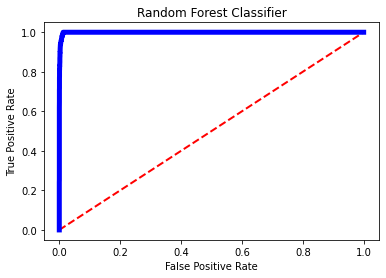

In [270]:
plt.plot([0, 1], [0, 1], 'k--', color = 'red', lw = 2)
plt.plot( fprate, tprate, color = 'b', lw = 5, label = 'ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.show()

### Deploy the model

In [271]:
import pickle

In [272]:
filename = 'avocado_region.pkl'
pickle.dump(final_model, open(filename, 'wb'))

### Conclusion 

In [274]:
load_model = pickle.load(open('avocado_region.pkl', 'rb'))
result = load_model.score(x_test, y_test)
print(result)

# 0.9317019722425128

0.9317019722425128


In [275]:
predicted = np.array(load_model.predict(x_test))
original = np.array(y_test)

In [276]:
# Creating Dataframe
conclusion = pd.DataFrame({'original Region': original, 'Predicted Region': predicted}, index = range(len(original)))

In [277]:
conclusion.head(10)

original Region  Predicted Region
0               19                19
1               45                45
2               37                37
3               43                43
4                1                 1
5               38                38
6               11                18
7                0                 0
8               49                49
9                1                 1